# University of London: BSc Computer Sciences

## CM3015 Machine Learning

### Final Project Report - Creating a ML Model using the Universal Workflow of DLWP Chapter 4.5

# Table of Contents:

- Abstract
- Introduction
- Stage 1: Dataset & Problem
- Stage 2: Measure of Success
- Stage 3: Evaluation Protocol
- Stage 4: Preparing Data
- Stage 5: Better Than Baseline Model - Underfitting + Statistical Power
- Stage 6: Purpouseful Overfitting
- Stage 7: Model Regularization & Hyperparameter Tuning
- Evaluation
- Conclusion
  

# Abstract

This report covers the conception, development, experimentation, and achievements of a machine learning model aimed at tackling a binary classification problem of classifying breast cancer growths as benign or malignant.

Through 7 stages:
1. The problem and dataset are chosen and implemented.
2. Data exploration determined the measure of success as Accuracy and Precision at Recall, and loss function is set for binary cross entropy
3. Evaluation Protocol is set to hold-out validation.
4. Data is pre-processed by removing and/or modifying unneeded/uneven features
5. Baseline model alongside 2 experimental models is established
6. Experimental models are pushed to overfitting to create a reference (control group) for further experiments.
7. Through rigorous experimentation, regularization is set for 0.5 Dropout on the input layer and hyperparameters for the final model are set at 120 epochs, 16 batch size, 128 units per layer,  and learning rate at 0.001

The final model consists of 4 RelU activation layers and one sigmoid activation output layer, achieving 97.8% mean accuracy, 6.1% mean loss(error), 95.5% mean precision at 96.2% mean recall, labelling the project as successful.

# Introduciton

<p>The aim of this report is to establish and document a problem and a model to solve it using the Universal Workflow of DLWP Chapter 4.5.
Including:<br/>"
<ol><b>
    <li>Defining the problem and assembling a dataset</li>
    <li>Choosing a measure of success</li>
    <li>Deciding on an evaluation protocol</li>
    <li>Preparing your data</li>
    <li>Developing a model that does better than a baseline</li>
    <li>Scaling up: developing a model that overfits</li>
    <li>Regularizing your model and tuning your hyperparameters</li>
</b></ol>"</br><i>quoted from Chollet F., Deep Learning With Python (2017), Chapter 4.5 </i></p>
<p>
    Each report segment follows the following structure: It includes a written explanation of the segment, the choices made by the author and the reasoning behind them and <i>(if needed)</i> includes the code written for the segment and its output.
</p>

# Stage 1: Dataset & Problem

### Defining the dataset and problem should not be separate:

Different datasets <i>(especially ready-made ones on tensorflow or scikit-learn dBs)</i> offer unique problems to solve. Therefore the choice is made based on the problem, models known to work well on solving said problem, and datasets representing it.

### Problems, Algorithms, Datasets table:
This table is composed of columns showcasing different problems, Algorithms that solve them, and datasets:
| Problem | Algorithm/s | Dataset\s |
| --- | --- | --- |
| Binary Classification | Naive Bayes, K-NN, Decision Tree, Random Forest, Logistic Regression, etc. | IMDB, MNIST, Wisconsin Breast Cancer |
|Multiclass Classification | Naive Bayes, Decision Tree, Random Forest, SVN, etc. | Reuters, COVID-19 Hospitals Treatment Plan, Cirrhosis Outcomes Dataset |
| Regression |  Linear, Polynomial, Stepwise,etc. | Boston Housing Price, Auto MPG | 


## The Dataset:

The dataset chosen is the <b> Wisconsin Breast Cancer</b> dataset. There are several websites it can be obtained from. For the sake of accuracy, the official UCI. It contains 569 instances across 30 features.

### The Problem:

The problem that this dataset tackles is producing a model able to classify breast cancer diagnoses as <b>benign</b> or <b>malignant</b> based on data on growths. As mentioned before, this is solved using a <b>binary classification</b> model as the possible model outputs are exactly 2.

### Relevance:

According to the American Cancer Society: "Breast cancer is the most common cancer in women in the US, except for skin cancer. It's also the second-leading cause of cancer death (after lung cancer). About 1 in 8 women will get invasive breast cancer in their lifetime."[1]

It is safe to assume that machine learning models aiding the diagnosis of terminal illnesses are not only relevant, but furthermore can prove to be life-saving as they mitigate the risk of human error during the diagnosis process or assist professionals by saving them valuable time.

## Hypothesis:
The hypotheses that are built in this stage are that: 
1. A breast cancer diagnosis of benign or malignant can be determined by the features of this dataset.
2. A model can be developed to determine this diagnosis with high accuracy

## Importing The Dataset

In [1]:
import tensorflow as tf
import pandas as pd

#Code Reference, Tensorflow Core, Guide, Logistic Regression Core, Setup section: https://www.tensorflow.org/guide/core/logistic_regression_core
#Only comments in this block are my own to prove my understanding of the snippets I am using

#get csv url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

#define basics of features 
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
#initialize each column answering to the .csv data
column_names = ['id', 'diagnosis']

#append each feature across all their attributes to column_names
for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)
#read .csv into pandas frame with the new column names
dataset = pd.read_csv(url, names=column_names)


In [2]:
#check if column_names of df answer to .csv data
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#check for data types and any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         569 non-null    int64  
 1   diagnosis                  569 non-null    object 
 2   radius_mean                569 non-null    float64
 3   texture_mean               569 non-null    float64
 4   perimeter_mean             569 non-null    float64
 5   area_mean                  569 non-null    float64
 6   smoothness_mean            569 non-null    float64
 7   compactness_mean           569 non-null    float64
 8   concavity_mean             569 non-null    float64
 9   concave_poinits_mean       569 non-null    float64
 10  symmetry_mean              569 non-null    float64
 11  fractal_dimension_mean     569 non-null    float64
 12  radius_ste                 569 non-null    float64
 13  texture_ste                569 non-null    float64

## Evaluating Dataset:

The dataset has 569 instances across 29 features, bringing it almost identical to the original specification in the ICU Irvine page. This is accepted as satisfactory, and work can continue to stage 2.

# Stage 2: Measure of Success

## Method of Determining Measure of Success:

The <b>measure of success</b> needed for this model is a satisfactory value (>90% accurate results). 

What is important is determining whether the dataset is balanced (i.e. Benign/malignant diagnoses approx. 50%) or imbalanced (in this case is considered benign/malignant >= 60%)

In [4]:
#original code, 
#simply prints the spread between benign/malignant values across each instance
b_count = dataset["diagnosis"].value_counts()["B"]
m_count = len(dataset.index) - b_count
b_perc = b_count/len(dataset.index) * 100
m_perc = 100 - b_perc
print("Benign:", b_count)
print("Malignant:", m_count)
print("Percent Benign:", b_perc, "%")
print("Percent Malignant:", m_perc, "%")


Benign: 357
Malignant: 212
Percent Benign: 62.741652021089635 %
Percent Malignant: 37.258347978910365 %


## Measure of Success: Precision at Recall

As the dataset is imbalanced with approx. 63% benign results, a simple accuracy check may not be the most useful in this case. Therefore, Precision at Recall will work best.

# Stage 3: Evaluation Protocol - Hold-Out Validation

As the dataset contains enough instances (determined by instances > features x 10), the evaluation protocol need not use K-fold Cross Validation. However, if models underperform regardless of hyperparameter tuning, training may be redone using K-fold Validation.

# Stage 4: Preparing Data

Preparing data involves:

1. Pre-processing data - clean up unneeded features, remove, modify or normalise features that have no statistical power ( values so incosistent they lead to overfitting) and other project-specific tasks i.e. mapping diagnoses instead of ("B, "M"), to the values (0, 1).
2. Loading data into tensors

## Removing Unneeded features: id

In [5]:
#Original Code in this Cell
#dropping id, uneeded
dataset.drop("id", axis = 1, inplace = True )
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,symmetry_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Modifying Features: Target

In [6]:
#Original Code in this Cell
#Remapping B and M to 0 and 1
dataset["diagnosis"] = dataset["diagnosis"].map({"B": 0, "M": 1})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,symmetry_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Modifying Features - Normalisation

The concept is the following - each feature is in a different range. 
For each feature X: <br>
$ if X(valuesMin) < 0 ? : X(valuesMapped) \in [-1, 1]$ <br>
$else: X(valuesMapped) \in [0, 1] $


In [40]:
#Original code
#are there values less than 0 in df?
has_minus = False

for col in dataset.columns:
    if dataset[col].lt(0).any():
        has_minus = True
        break

print(has_minus)

False


### As no values < 0, the Dataframe will be normalised to [0,1]

In [84]:
#first line of code adapted from Stack Overflow user Cina, Feb 6, 2020, "Normalize columns of a dataframe"
#https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe
df_scaled=(dataset-dataset.min())/(dataset.max()-dataset.min())
#Original Code
df_scaled["diagnosis"] = df_scaled["diagnosis"].astype(int)

## Formatting Data 

Finally, after removing unneeded values, then modifying and normalising values for training, data will be split into 80% training and 20% testing X and Y tensors.

In [89]:
#Original code
import sklearn
y = np.array(df_scaled["diagnosis"])
x = np.array(df_scaled.drop("diagnosis",axis=1))



In [113]:
#Original code
#split by 80%
cut_off = round(len(df_scaled["diagnosis"]) * 0.8)

#finally convert to tensor
x_train = tf.convert_to_tensor(x[0:cut_off])
x_test = tf.convert_to_tensor(x[cut_off:])
y_train = tf.convert_to_tensor(y[0:cut_off])
y_test = tf.convert_to_tensor(y[cut_off:])
x_train.shape

TensorShape([455, 30])

# Stage 5: Better Than Baseline Model - Underfitting + Statistical Power

This section focuses on building a model that is intentionally underfitted, in order to see the statistical power of the algorithms used. This section explores playing with last layer activations.

## Building the Model

This tests involves 3 models: 

| Model Name | Epochs | Batch Size | Non-output Layers | Units/Layer | Activation Input Layer | Activation Output Layer | Optimizer | Loss | Metrics |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Baseline | 8 | 5 | 1 | 5 | linear | sigmoid | rmsprop | binary cross entropy | precision at recall |
| Relu RMS | 8 | 5 | 1 | 5 | relU | sigmoid | rmsprop | binary cross entropy | precision at recall |
| Relu ADAM | 8 | 5 | 1 | 5 | relU | sigmoid | adam | binary cross entropy | precision at recall |


The goal is to establish a baseline using low values to cause intentional underfitting then using the same values test on other input layer activations and optimizers.

### Model 1: Baseline
The linear activation model

In [1016]:
#Original code
from tensorflow import keras
from keras import models 
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

#underfitting variables to be used by both models
epochs_underfit = 8
batch_size_underfit = 5

baseline_model = Sequential()

#Input layer
baseline_model.add(Dense(units=5, activation='linear', input_dim=30))
#Output layer
baseline_model.add(Dense(units=1, activation='sigmoid'))

#Compiling - optimizers, loss function, metrics
baseline_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

baseline_model.summary()

Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1002 (Dense)          (None, 5)                 155       
                                                                 
 dense_1003 (Dense)          (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


#### Fitting

In [1017]:
#Original code
baseline_history = baseline_model.fit(x_train, y_train, epochs=epochs_underfit, batch_size=batch_size_underfit, validation_data=(x_test, y_test))

Epoch 1/8
91/91 [==============================] - 3s 5ms/step - loss: 0.6690 - accuracy: 0.5560 - precision_251: 0.4793 - recall_251: 0.9946 - val_loss: 0.6664 - val_accuracy: 0.5263 - val_precision_251: 0.3250 - val_recall_251: 1.0000
Epoch 2/8
91/91 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.8132 - precision_251: 0.6920 - recall_251: 0.9785 - val_loss: 0.6079 - val_accuracy: 0.8246 - val_precision_251: 0.5652 - val_recall_251: 1.0000
Epoch 3/8
91/91 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.9231 - precision_251: 0.8647 - recall_251: 0.9624 - val_loss: 0.5446 - val_accuracy: 0.8947 - val_precision_251: 0.6842 - val_recall_251: 1.0000
Epoch 4/8
91/91 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.9275 - precision_251: 0.9048 - recall_251: 0.9194 - val_loss: 0.4871 - val_accuracy: 0.9035 - val_precision_251: 0.7027 - val_recall_251: 1.0000
Epoch 5/8
91/91 [==============================] - 0

### Displaying Results for Baseline Model

This will give an idea of the value the <b>Experiment 1</b> model has to surpass in order to satisfy the conditions of this stage.

#### Loss 

0.4830281399190426
0.4670756459236145


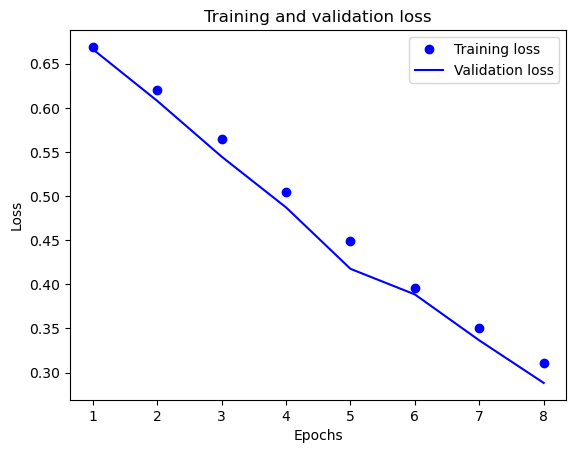

In [1018]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = baseline_history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
print(sum(loss_values)/len(loss_values))
print(sum(val_loss_values)/len(val_loss_values))
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy:

0.8645604476332664
0.8475877195596695


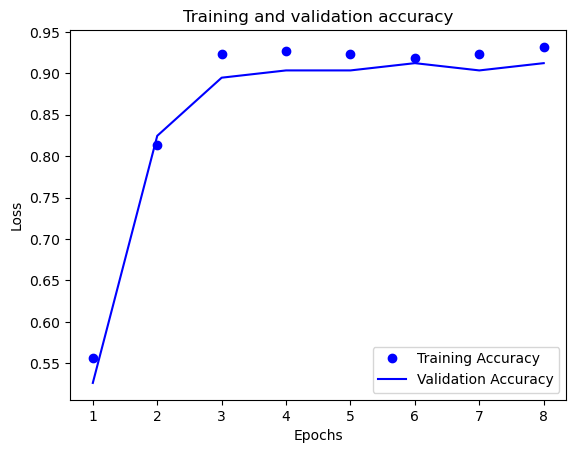

In [1019]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(sum(acc_values)/len(acc_values))
print(sum(val_acc_values)/len(val_acc_values))
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Parameters

In [1020]:
#Original code
print(compare_histories([history_dict]))

{'Loss Min': [0.311024010181427, 'Dict0'], 'Loss Mean': [0.4830281399190426, 'Dict0'], 'Loss Last': [0.311024010181427, 'Dict0'], 'Accuracy Max': [0.9318681359291077, 'Dict0'], 'Accuracy Mean': [0.8645604476332664, 'Dict0'], 'Accuracy Last': [0.9318681359291077, 'Dict0'], 'Precision Max': [0.9356725215911865, 'Dict0'], 'Precision Mean': [0.8264993838965893, 'Dict0'], 'Precision Last': [0.9234972596168518, 'Dict0'], 'Recall Max': [0.9946236610412598, 'Dict0'], 'Recall Mean': [0.9294354915618896, 'Dict0'], 'Recall Last': [0.9086021780967712, 'Dict0'], 'Val Loss Min': [0.28819355368614197, 'Dict0'], 'Val Loss Mean': [0.4670756459236145, 'Dict0'], 'Val Loss Last': [0.28819355368614197, 'Dict0'], 'Val Accuracy Max': [0.9122806787490845, 'Dict0'], 'Val Accuracy Mean': [0.8475877195596695, 'Dict0'], 'Val Accuracy Last': [0.9122806787490845, 'Dict0'], 'Val Precision Max': [0.7666666507720947, 'Dict0'], 'Val Precision Mean': [0.6544034630060196, 'Dict0'], 'Val Precision Last': [0.76666665077209

### Model Relu RMS

In [1021]:
#Original code
relu_rms_model = models.Sequential()

relu_rms_model.add(layers.Dense(units=5, activation='relu', input_dim=30))

relu_rms_model.add(layers.Dense(units=1, activation='sigmoid'))

relu_rms_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

relu_rms_model.summary()

Model: "sequential_232"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1004 (Dense)          (None, 5)                 155       
                                                                 
 dense_1005 (Dense)          (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


#### Fitting

In [1022]:
#Original code
relu_rms_model = relu_rms_model.fit(x_train, y_train, epochs=epochs_underfit, batch_size=batch_size_underfit, validation_data=(x_test, y_test))

Epoch 1/8
91/91 [==============================] - 1s 5ms/step - loss: 0.6816 - accuracy: 0.5209 - precision_252: 0.4585 - recall_252: 0.9516 - val_loss: 0.6742 - val_accuracy: 0.6053 - val_precision_252: 0.3662 - val_recall_252: 1.0000
Epoch 2/8
91/91 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7846 - precision_252: 0.7018 - recall_252: 0.8226 - val_loss: 0.6287 - val_accuracy: 0.8596 - val_precision_252: 0.6250 - val_recall_252: 0.9615
Epoch 3/8
91/91 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.8703 - precision_252: 0.8547 - recall_252: 0.8226 - val_loss: 0.5778 - val_accuracy: 0.9386 - val_precision_252: 0.8800 - val_recall_252: 0.8462
Epoch 4/8
91/91 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.8835 - precision_252: 0.9182 - recall_252: 0.7849 - val_loss: 0.5438 - val_accuracy: 0.9298 - val_precision_252: 0.8000 - val_recall_252: 0.9231
Epoch 5/8
91/91 [==============================] - 0

#### Loss 

0.5572385042905807
0.5325582176446915


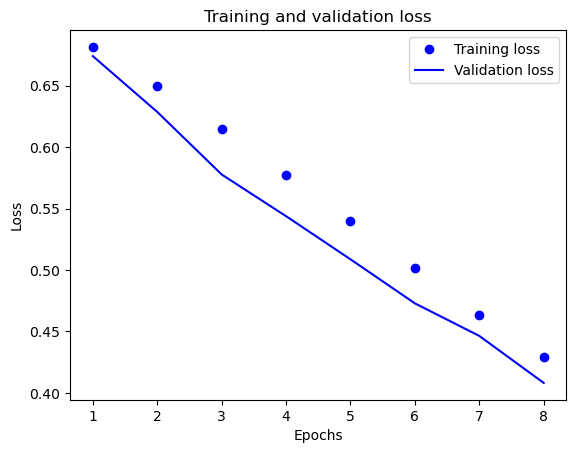

In [1023]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = relu_rms_model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
print(sum(loss_values)/len(loss_values))
print(sum(val_loss_values)/len(val_loss_values))
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy:

0.8324175924062729
0.8750000149011612


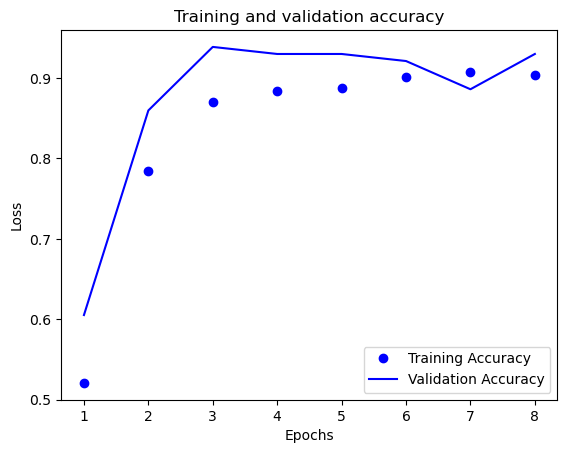

In [1024]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(sum(acc_values)/len(acc_values))
print(sum(val_acc_values)/len(val_acc_values))
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Parameters

In [1025]:
#Original code
print(compare_histories([history_dict]))

{'Loss Min': [0.4289276897907257, 'Dict0'], 'Loss Mean': [0.5572385042905807, 'Dict0'], 'Loss Last': [0.4289276897907257, 'Dict0'], 'Accuracy Max': [0.9076923131942749, 'Dict0'], 'Accuracy Mean': [0.8324175924062729, 'Dict0'], 'Accuracy Last': [0.903296709060669, 'Dict0'], 'Precision Max': [0.9235293865203857, 'Dict0'], 'Precision Mean': [0.824572030454874, 'Dict0'], 'Precision Last': [0.9034090638160706, 'Dict0'], 'Recall Max': [0.9516128897666931, 'Dict0'], 'Recall Mean': [0.838709682226181, 'Dict0'], 'Recall Last': [0.8548387289047241, 'Dict0'], 'Val Loss Min': [0.4080696403980255, 'Dict0'], 'Val Loss Mean': [0.5325582176446915, 'Dict0'], 'Val Loss Last': [0.4080696403980255, 'Dict0'], 'Val Accuracy Max': [0.9385964870452881, 'Dict0'], 'Val Accuracy Mean': [0.8750000149011612, 'Dict0'], 'Val Accuracy Last': [0.9298245906829834, 'Dict0'], 'Val Precision Max': [0.8799999952316284, 'Dict0'], 'Val Precision Mean': [0.7083685770630836, 'Dict0'], 'Val Precision Last': [0.78125, 'Dict0'], 

### Model Relu ADAM

In [1026]:
#Original code
relu_adam_model = models.Sequential()

relu_adam_model.add(layers.Dense(units=5, activation='relu', input_dim=30))

relu_adam_model.add(layers.Dense(units=1, activation='sigmoid'))

relu_adam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

relu_adam_model.summary()

Model: "sequential_233"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1006 (Dense)          (None, 5)                 155       
                                                                 
 dense_1007 (Dense)          (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


#### Fitting

In [1027]:
#Original code
relu_adam_model = relu_adam_model.fit(x_train, y_train, epochs=epochs_underfit, batch_size=batch_size_underfit, validation_data=(x_test, y_test))

Epoch 1/8
91/91 [==============================] - 1s 5ms/step - loss: 0.6908 - accuracy: 0.5407 - precision_253: 0.2982 - recall_253: 0.0914 - val_loss: 0.6771 - val_accuracy: 0.7544 - val_precision_253: 0.3333 - val_recall_253: 0.0769
Epoch 2/8
91/91 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7231 - precision_253: 0.6948 - recall_253: 0.5753 - val_loss: 0.6474 - val_accuracy: 0.6667 - val_precision_253: 0.4062 - val_recall_253: 1.0000
Epoch 3/8
91/91 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.7758 - precision_253: 0.6544 - recall_253: 0.9570 - val_loss: 0.5806 - val_accuracy: 0.8070 - val_precision_253: 0.5435 - val_recall_253: 0.9615
Epoch 4/8
91/91 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8835 - precision_253: 0.8122 - recall_253: 0.9301 - val_loss: 0.5357 - val_accuracy: 0.7895 - val_precision_253: 0.5208 - val_recall_253: 0.9615
Epoch 5/8
91/91 [==============================] - 0

#### Loss 

0.5214887224137783
0.5079277157783508


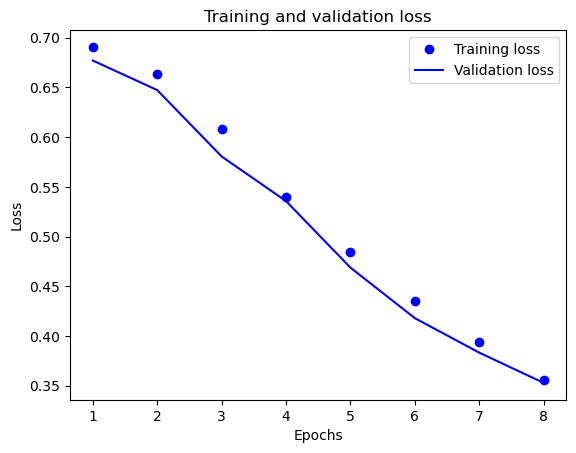

In [1028]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = relu_adam_model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
print(sum(loss_values)/len(loss_values))
print(sum(val_loss_values)/len(val_loss_values))
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy:

0.8211538568139076
0.8234649151563644


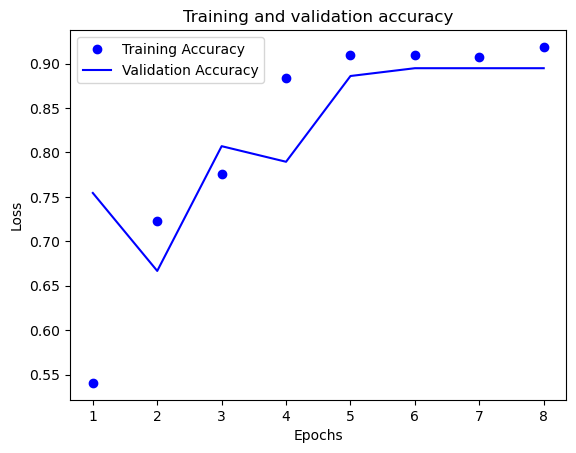

In [1029]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(sum(acc_values)/len(acc_values))
print(sum(val_acc_values)/len(val_acc_values))
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Parameters

In [1033]:
#Original code
print(compare_histories([history_dict]))

{'Loss Min': [0.35573810338974, 'Dict0'], 'Loss Mean': [0.5214887224137783, 'Dict0'], 'Loss Last': [0.35573810338974, 'Dict0'], 'Accuracy Max': [0.9186813235282898, 'Dict0'], 'Accuracy Mean': [0.8211538568139076, 'Dict0'], 'Accuracy Last': [0.9186813235282898, 'Dict0'], 'Precision Max': [0.8860103487968445, 'Dict0'], 'Precision Mean': [0.7406222373247147, 'Dict0'], 'Precision Last': [0.8860103487968445, 'Dict0'], 'Recall Max': [0.9569892287254333, 'Dict0'], 'Recall Mean': [0.782930102199316, 'Dict0'], 'Recall Last': [0.9193548560142517, 'Dict0'], 'Val Loss Min': [0.35283711552619934, 'Dict0'], 'Val Loss Mean': [0.5079277157783508, 'Dict0'], 'Val Loss Last': [0.35283711552619934, 'Dict0'], 'Val Accuracy Max': [0.8947368264198303, 'Dict0'], 'Val Accuracy Mean': [0.8234649151563644, 'Dict0'], 'Val Accuracy Last': [0.8947368264198303, 'Dict0'], 'Val Precision Max': [0.6944444179534912, 'Dict0'], 'Val Precision Mean': [0.5703629814088345, 'Dict0'], 'Val Precision Last': [0.6944444179534912,

## Model Analysis - Training

This final sub-section analyses the models in order to see if they hold statistical power.
This table displays their results during training:

| Metric          | Baseline | Relu RMS | Relu ADAM |
|-----------------|----------|----------|-----------|
| Loss Min        | **0.311**| 0.429    | 0.356     |
| Loss Mean       | **0.483**| 0.557    | 0.521     |
| Loss Last       | **0.311**| 0.429    | 0.356     |
| Accuracy Max    | **0.932**| 0.908    | 0.919     |
| Accuracy Mean   | **0.865**| 0.832    | 0.821     |
| Accuracy Last   | **0.932**| 0.903    | 0.919     |
| Precision Max   | **0.936**| 0.924    | 0.886     |
| Precision Mean  | **0.826**| 0.825    | 0.741     |
| Precision Last  | **0.923**| 0.903    | 0.886     |
| Recall Max      | **0.995**| 0.952    | 0.957     |
| Recall Mean     | **0.929**| 0.839    | 0.783     |
| Recall Last     | **0.909**| 0.855    | 0.919     |

## Model Analysis - Validation

This table displays their results during validation:

| Metric           | Baseline | Relu RMS | Relu ADAM |
|------------------|----------|----------|-----------|
| Val Loss Min     | **0.288**| 0.408    | 0.353     |
| Val Loss Mean    | **0.467**| 0.533    | 0.508     |
| Val Loss Last    | **0.288**| 0.408    | 0.353     |
| Val Accuracy Max | 0.912| **0.939**    | 0.895     |
| Val Accuracy Mean| 0.848| **0.875**    | 0.823     |
| Val Accuracy Last| **0.912**| 0.930    | 0.895     |
| Val Precision Max| 0.767    | **0.880**| 0.694     |
| Val Precision Mean| 0.654   | **0.708**| 0.570     |
| Val Precision Last| 0.767| **0.781**    | 0.694     |
| Val Recall Max   | **1.000**| 1.000    | 1.000     |
| Val Recall Mean  | **0.962**| 0.947    | 0.856     |
| Val Recall Last  | 0.885    | **0.962**| 0.962     |

## Model Analysis - Takeaways

The baseline model performed best on training across almost all fields, ADAM coming in at close second.

During Validation, RMS shows significant leads on precision and accuracy values.

The conclusion of this analysis is that the RMSProp model has statistical power on merits of its performance during validation, however being underfit currently it is less likely for any model to show their full potential. Further testing is needed on both models. 

# Stage 6: Purpouseful Overfitting

This section focuses on purposeful overfitting of each of the two models. These experiments show their learning capacities and thresholds.
Each model will have 2 more layers, 100 units, train for 1000 epochs at a batch size of 64

## Overfitting RMS Model

In [1246]:
#Original code
epochs_overfit = 1000
batch_size_overfit = 64

relu_rms_model = models.Sequential()

relu_rms_model.add(layers.Dense(units=1000, activation='relu', input_dim=30))
relu_rms_model.add(layers.Dense(units=1000, activation='relu', input_dim=30))
relu_rms_model.add(layers.Dense(units=1000, activation='relu', input_dim=30))

relu_rms_model.add(layers.Dense(units=1, activation='sigmoid'))

relu_rms_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

relu_rms_model.summary()

Model: "sequential_319"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1405 (Dense)          (None, 1000)              31000     
                                                                 
 dense_1406 (Dense)          (None, 1000)              1001000   
                                                                 
 dense_1407 (Dense)          (None, 1000)              1001000   
                                                                 
 dense_1408 (Dense)          (None, 1)                 1001      
                                                                 
Total params: 2,034,001
Trainable params: 2,034,001
Non-trainable params: 0
_________________________________________________________________


### Fitting

In [1247]:
#Original code
relu_rms_model = relu_rms_model.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test),verbose=0)

#### Loss 

0.029376593427563876
0.1365417102860256


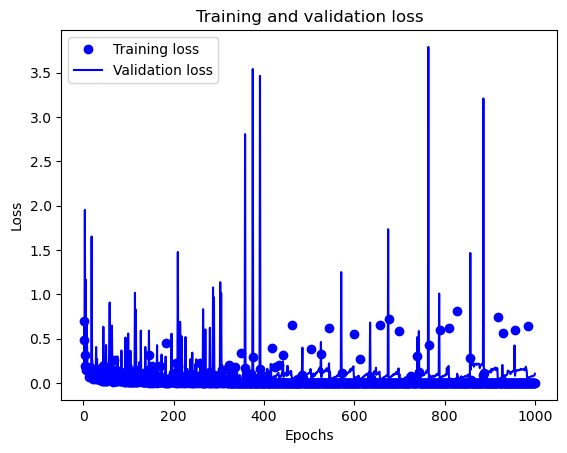

In [776]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = relu_rms_model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
print(sum(loss_values)/len(loss_values))
print(sum(val_loss_values)/len(val_loss_values))
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy:

0.9939670333266258
0.9667894733250141


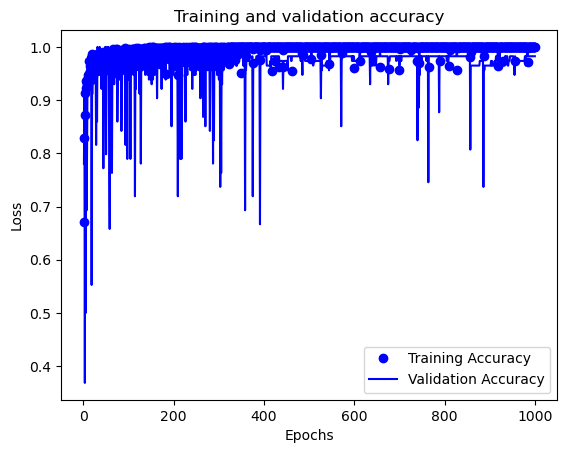

In [777]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(sum(acc_values)/len(acc_values))
print(sum(val_acc_values)/len(val_acc_values))
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Parameters

In [850]:
print(compare_histories([history_dict]))

{'Loss Min': [6.014553743938222e-09, 'Dict0'], 'Loss Mean': [0.029376593427563876, 'Dict0'], 'Loss Last': [1.396665254560503e-07, 'Dict0'], 'Accuracy Max': [1.0, 'Dict0'], 'Accuracy Mean': [0.9939670333266258, 'Dict0'], 'Accuracy Last': [1.0, 'Dict0'], 'Precision Max': [1.0, 'Dict0'], 'Precision Mean': [0.9921075809597969, 'Dict0'], 'Precision Last': [1.0, 'Dict0'], 'Recall Max': [1.0, 'Dict0'], 'Recall Mean': [0.9932849479913711, 'Dict0'], 'Recall Last': [1.0, 'Dict0'], 'Val Loss Min': [1.47733981066267e-05, 'Dict0'], 'Val Loss Mean': [0.1365417102860256, 'Dict0'], 'Val Loss Last': [0.10355515033006668, 'Dict0'], 'Val Accuracy Max': [1.0, 'Dict0'], 'Val Accuracy Mean': [0.9667894733250141, 'Dict0'], 'Val Accuracy Last': [0.9824561476707458, 'Dict0'], 'Val Precision Max': [1.0, 'Dict0'], 'Val Precision Mean': [0.8976975303292275, 'Dict0'], 'Val Precision Last': [0.9285714030265808, 'Dict0'], 'Val Recall Max': [1.0, 'Dict0'], 'Val Recall Mean': [0.9901923073269426, 'Dict0'], 'Val Recall

## Overfitting ADAM Model

In [1248]:
#Original code
relu_adam_model = models.Sequential()

relu_adam_model.add(layers.Dense(units=1000, activation='relu', input_dim=30))
relu_adam_model.add(layers.Dense(units=1000, activation='relu', input_dim=30))
relu_adam_model.add(layers.Dense(units=1000, activation='relu', input_dim=30))

relu_adam_model.add(layers.Dense(units=1, activation='sigmoid'))

relu_adam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

relu_adam_model.summary()

Model: "sequential_320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1409 (Dense)          (None, 1000)              31000     
                                                                 
 dense_1410 (Dense)          (None, 1000)              1001000   
                                                                 
 dense_1411 (Dense)          (None, 1000)              1001000   
                                                                 
 dense_1412 (Dense)          (None, 1)                 1001      
                                                                 
Total params: 2,034,001
Trainable params: 2,034,001
Non-trainable params: 0
_________________________________________________________________


#### Fitting

In [1249]:
#Original code
relu_adam_model = relu_adam_model.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test),verbose=0)

#### Loss 

0.006252830681867174
0.10459506670478731


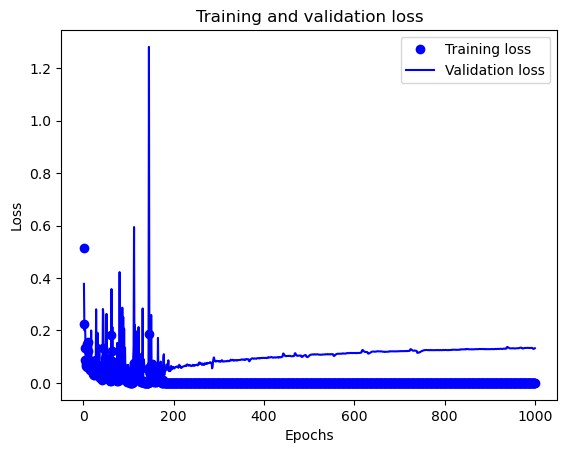

In [853]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = relu_adam_model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
print(sum(loss_values)/len(loss_values))
print(sum(val_loss_values)/len(val_loss_values))
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy:

0.997545055091381
0.9655614113807678


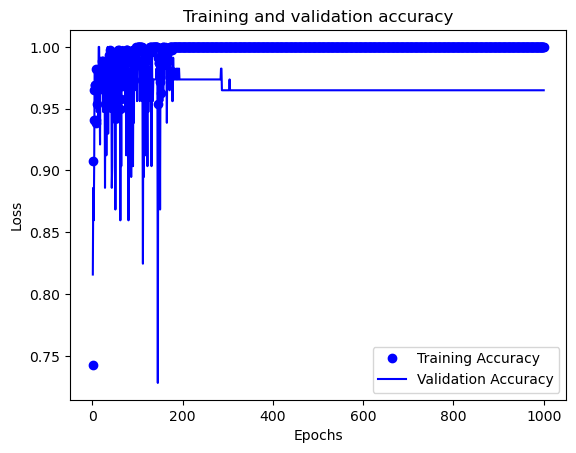

In [854]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(sum(acc_values)/len(acc_values))
print(sum(val_acc_values)/len(val_acc_values))
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Parameters

In [856]:
print(compare_histories([history_dict]))

{'Loss Min': [5.964960791970952e-08, 'Dict0'], 'Loss Mean': [0.006252830681867174, 'Dict0'], 'Loss Last': [5.966797544942892e-08, 'Dict0'], 'Accuracy Max': [1.0, 'Dict0'], 'Accuracy Mean': [0.997545055091381, 'Dict0'], 'Accuracy Last': [1.0, 'Dict0'], 'Precision Max': [1.0, 'Dict0'], 'Precision Mean': [0.9973447184562683, 'Dict0'], 'Precision Last': [1.0, 'Dict0'], 'Recall Max': [1.0, 'Dict0'], 'Recall Mean': [0.9968279573917389, 'Dict0'], 'Recall Last': [1.0, 'Dict0'], 'Val Loss Min': [0.004544681403785944, 'Dict0'], 'Val Loss Mean': [0.10459506670478731, 'Dict0'], 'Val Loss Last': [0.1322399526834488, 'Dict0'], 'Val Accuracy Max': [1.0, 'Dict0'], 'Val Accuracy Mean': [0.9655614113807678, 'Dict0'], 'Val Accuracy Last': [0.9649122953414917, 'Dict0'], 'Val Precision Max': [1.0, 'Dict0'], 'Val Precision Mean': [0.8742635014653206, 'Dict0'], 'Val Precision Last': [0.8666666746139526, 'Dict0'], 'Val Recall Max': [1.0, 'Dict0'], 'Val Recall Mean': [0.9972307686209678, 'Dict0'], 'Val Recall 

 ## Model Analysis - Training

This final sub-section analyses the models in order to see if they hold statistical power.
This table displays their results during training:

| Metric          | RMS       | ADAM      |
|-----------------|-----------|-----------|
| Loss Min        | **6.01e-09** | 5.96e-08 |
| Loss Mean       | 0.029     | **0.006** |
| Loss Last       | 1.40e-07 | **5.97e-08** |
| Accuracy Max    | **1.000** | **1.000** |
| Accuracy Mean   | 0.994 | **0.998**     |
| Accuracy Last   | **1.000** | **1.000** |
| Precision Max   | **1.000** | **1.000** |
| Precision Mean  | 0.992 | **0.997**     |
| Precision Last  | **1.000** | **1.000** |
| Recall Max      | **1.000** | **1.000** |
| Recall Mean     | 0.993 | **0.997**     |
| Recall Last     | **1.000** | **1.000** |

 ## Model Analysis - Validation

This table displays their results during validation:

| Metric           | RMS       | ADAM      |
|------------------|-----------|-----------|
| Val Loss Min     | **1.48e-05** | 0.004     |
| Val Loss Mean    | 0.137     | **0.105**     |
| Val Loss Last    | **0.104**     | 0.132     |
| Val Accuracy Max | **1.000** | **1.000** |
| Val Accuracy Mean| **0.967** | 0.966     |
| Val Accuracy Last| **0.982** | 0.965     |
| Val Precision Max| **1.000** | **1.000** |
| Val Precision Mean| **0.898**     | 0.874 |
| Val Precision Last| **0.929**     | 0.867     |
| Val Recall Max   | **1.000** | **1.000** |
| Val Recall Mean  | 0.990 | **0.997**     |
| Val Recall Last  | **1.000** | **1.000** |

 ## Model Analysis - Takeaways

In training, results are a close tie as both models are quite overfitted, however during validation RMS is consistently and increasingly performing better.
This means 2 things:
1. ADAM begins Overfitting first in order to get such solid training results
2. RMS manages to get significantly higher validation results despite overfitting

### Conclusion: the learning capacity of Model RMS is higher than that of Model ADAM. 

### Therefore the final stage will be done only using Model Relu RMS

# Stage 7: Model Regularization & Hyperparameter Tuning

This stage focuses on regularising the model. This will be separated into several sections where experiments will be done using:
- Adding various amounts of Dropout regularization
- More or Less Layers
- L1 and/or L2 Regularization
- Hyperparameter Tuning - units per layer, optimizer learning rate, epochs, batch size 

## Model History Comparison functions

To make the experimentation and exploration process much more efficient, a dictionary storing all best outputs across across models with labels pertaining pertaining to each model is a good addition to the current toolkit. 

This helps reduce code size for comparing 2 or more models. As this is a large task, firstly several helper functions interact with it and are described below in sub-headings and comments.

### Helper Functions - Getting Group Max and Minimum

These 2 functions retrieve a value group i.e. "Loss": "Min", "Mean", "Last" and compare each value group attribute to the current stored best attribute in the information dictionary. Each value group is separated into 2 types a Min and Max group. Accuracy is a max group - information

In [857]:
#Original Code
def update_group_min(label,dict_key,info_label,hist_dict,info):
    minimum = min(hist_dict[dict_key]) #gets min value 
    if  minimum < info[info_label + " Min"][0]: #compares to info dict
        info[info_label + " Min"] = [minimum, label] #updates info dict
        
    mean = sum(hist_dict[dict_key])/len(hist_dict[dict_key]) #gets mean value    
    if mean < info[info_label + " Mean"][0]: #compares to info dict
        info[info_label + " Mean"] = [mean, label] #updates info dict
        
    last = hist_dict[dict_key][len(hist_dict[dict_key]) - 1] #gets last value 
    if last < info[info_label + " Last"][0]: #compares to info dict
        info[info_label + " Last"] = [last, label] #updates info dict

In [858]:
#Original code
def update_group_max(label,dict_key,info_label,hist_dict,info):
    maximum = max(hist_dict[dict_key]) #gets max value
    if  maximum > info[info_label + " Max"][0]: #compares to info dict
        info[info_label + " Max"] = [maximum, label] #updates info dict
    
    mean = sum(hist_dict[dict_key])/len(hist_dict[dict_key]) #gets mean value
    if mean > info[info_label + " Mean"][0]: #compares to info dict
        info[info_label + " Mean"] = [mean, label] #updates info dict

    last = hist_dict[dict_key][len(hist_dict[dict_key]) - 1] #gets last value
    if last > info[info_label + " Last"][0]: #compares to info dict
        info[info_label + " Last"] = [last, label] #updates info dict

### Helper Function - Update Info Value group

This function does 3 jobs: 
1. Generates a label to put in the information dict.
2. Generates accurate keys: "info_label" for information dictionary and "dict_key" for the model history dictionary (using string manipulation)
3. Uses said keys to update an information dictionary value group with regards to whether that group is updated on Min or Max basis 

In [859]:
#Original code
def update_info_value_group(value, i, hist_dict, info):
    label = "Dict" + str(i) #generates label to put in info dict
    dict_key = value
    value_arr = value.split('_') #splits value into string array (useful for history dict keys for validation)
    for j in range(len(value_arr)):
        value_arr[j] = value_arr[j].capitalize() #capitalizes the first letter of each value_arr element
    info_label = " ".join(value_arr)#joins into space separated string. i.e. value = "val_loss", info_label = "Val Loss"
    if "precision" in value or "recall" in value: #precision and recall require different logic as the keys themselves have a number in the end
        for key in hist_dict.keys(): #loops through hist_dict keys
            if value in key: #checks for substring i.e. returns true if value == "precision" and "key == precision_27"
                #checks if both have or don't have val_ to avoid overwriting training data onto validation data 
                if ("val_" in key and "val_" in value) or ("val_" not in key and "val_" not in value):
                    dict_key = key#retrieves the real dict key
    if "loss" in dict_key:#check if group requires min/max update
        update_group_min(label,dict_key,info_label,hist_dict,info) #update group
    else:
        update_group_max(label,dict_key,info_label,hist_dict,info) #update group

In [860]:
#Original code
def compare_histories( hist_dicts_arr):
    #init info dict with max/min values
    info = {
        "Loss Min": [1,"none"],
        "Loss Mean": [1,"none"],
        "Loss Last": [1,"none"],
        "Accuracy Max": [0,"none"],
        "Accuracy Mean": [0,"none"],
        "Accuracy Last": [0,"none"],        
        "Precision Max": [0,"none"],
        "Precision Mean": [0,"none"],
        "Precision Last": [0,"none"],
        "Recall Max": [0,"none"],
        "Recall Mean": [0,"none"],
        "Recall Last": [0,"none"],
        "Val Loss Min": [1,"none"],
        "Val Loss Mean": [1,"none"],
        "Val Loss Last": [1,"none"],
        "Val Accuracy Max": [0,"none"],
        "Val Accuracy Mean": [0,"none"],
        "Val Accuracy Last": [0,"none"],        
        "Val Precision Max": [0,"none"],
        "Val Precision Mean": [0,"none"],
        "Val Precision Last": [0,"none"],
        "Val Recall Max": [0,"none"],
        "Val Recall Mean": [0,"none"],
        "Val Recall Last": [0,"none"]  
    }
    #loop through each history dict
    for i in range(len(hist_dicts_arr)):
        #init value groups
        values = ["loss","accuracy","precision","recall","val_loss","val_accuracy","val_precision","val_recall"]
        for val in values:#update each value group
            update_info_value_group(val,i,hist_dicts_arr[i],info)
    return info #return info dict

## Dropout

Dropout regularization ensures models are difficult to overfit by simply reducing random values to 0 on a layer. Dropout experimentation on this project follows these rules:
1. The overfitting model history is used as a baseline
2. Each Dropout model must be identical to the overfitting model except for its dropout.
3. 3 Major experiments hold N minor experiments:
    1. 33% Dropout - on one of the 3 non-output layers, 6 minor experiments regard which non-output layer and dropout rate.
    2. 66% Dropout - on 2 of the 3 non-output layers, minor experiments  regard which non-output layers.
    3. 100% Dropout - on each non-output layer.
4. If a Major experiment delivers worse results than baseline despite all minor experiments. Following major experiments are cancelled.


### 33% Dropout - Control model

This experiment ascertain whether dropout benefits or worsens the current model at all.
This is achieved by applying dropout to only one layer. 
If results are satisfactory, more dropout is introduced. 

6 dropout models are made:
| Model Variant | Dropout Layer | Dropout Rate | Epochs|
|---------------|-------------|--------------|-------|
| Drop1Quart | 1 | 0.25 | 100
| Drop1Half | 1 | 0.5 | 100
| Drop2Quart | 2 | 0.25 | 100
| Drop2Half | 2 | 0.5 | 100
| Drop3Quart | 3 | 0.25 | 100
| Drop3Half | 3 | 0.5 | 100


#### Drop1Quart

This model applies Dropout on the first input layer at a 0.25 rate.

In [1052]:
#Original code
#store history dict
overfit_dict = history_dict


In [1053]:
#Original code
from tensorflow.keras.layers import Dropout
drop_1_quart = models.Sequential()
#input layer
drop_1_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_1_quart.add(Dropout(0.25))
drop_1_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_1_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
#output layer
drop_1_quart.add(layers.Dense(units=1, activation='sigmoid'))

drop_1_quart.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1054]:
drop_1_quart_history = drop_1_quart.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_1_quart_history_dict = drop_1_quart_history.history

#### Drop1Half

This model applies Dropout on the first input layer at a 0.5 rate.

In [1055]:
#Original code
drop_1_half = models.Sequential()
#input layer
drop_1_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_1_half.add(Dropout(0.5))
drop_1_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_1_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
#output layer
drop_1_half.add(layers.Dense(units=1, activation='sigmoid'))

drop_1_half.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1056]:
drop_1_half_history = drop_1_half.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_1_half_history_dict = drop_1_half_history.history

#### Drop2Quart

This model applies Dropout on the second layer at a 0.25 rate.

In [1057]:
#Original code
drop_2_quart = models.Sequential()
#input layer
drop_2_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_2_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_2_quart.add(Dropout(0.25))
drop_2_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
#output layer
drop_2_quart.add(layers.Dense(units=1, activation='sigmoid'))

drop_2_quart.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1058]:
drop_2_quart_history = drop_2_quart.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_2_quart_history_dict = drop_2_quart_history.history

#### Drop2Half

This model applies Dropout on the second layer at a 0.5 rate.

In [1059]:
#Original code
drop_2_half = models.Sequential()
#input layer
drop_2_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_2_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_2_half.add(Dropout(0.5))
drop_2_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
#output layer
drop_2_half.add(layers.Dense(units=1, activation='sigmoid'))

drop_2_half.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1060]:
drop_2_half_history = drop_2_half.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_2_half_history_dict = drop_2_half_history.history

#### Drop3Quart

This model applies Dropout on the third layer at a 0.25 rate.

In [1061]:
#Original code
drop_3_quart = models.Sequential()
#input layer
drop_3_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_3_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_3_quart.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_3_quart.add(Dropout(0.25))
#output layer
drop_3_quart.add(layers.Dense(units=1, activation='sigmoid'))

drop_3_quart.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1062]:
drop_3_quart_history = drop_3_quart.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_3_quart_history_dict = drop_3_quart_history.history

#### Drop3Half

This model applies Dropout on the third layer at a 0.5 rate.

In [1063]:
#Original code
drop_3_half = models.Sequential()
#input layer
drop_3_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_3_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_3_half.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_3_half.add(Dropout(0.5))
#output layer
drop_3_half.add(layers.Dense(units=1, activation='sigmoid'))

drop_3_half.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1064]:
drop_3_half_history = drop_3_half.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_3_half_history_dict = drop_3_half_history.history

#### 33% Dropout - Analysis

After each model is fitted, their histories are compared and analysed:

In [1066]:
#Original Code
#0-overfit
#1,2 - drop1 quart, half
#3,4 - drop2 quart, half
#5,6 - drop3, quart, half
dicts = [overfit_dict,drop_1_quart_history_dict, drop_1_half_history_dict,drop_2_quart_history_dict, drop_2_half_history_dict, drop_3_quart_history_dict, drop_3_half_history_dict]
dropout_33_info = compare_histories(dicts)

In [1067]:
#Original Code
#raw print of the data
#print(dropout_33_info)

#print of most successful model
model_labels = ["Overfit", "Drop1Quart","Drop1Half","Drop2Quart","Drop2Half","Drop3Quart","Drop3Half"]
def print_dict_results(info, labels):
    counter = {}
    for key in info.keys():
        win = info[key][1].split("Dict")[1]
        if win in counter.keys():
            counter[win]+=1
        else:
            counter[win]=1

    for i in range(len(model_labels)):
        if str(i) not in counter.keys():
            counter[str(i)] = 0

    for i in range(len(counter.keys())):
        categories = []
        for key in info.keys():
            if str(i) in info[key][1]:
                categories.append(key)
        print(labels[i]," best in",counter[str(i)],"categories:",", ".join(categories))

print_dict_results(dropout_33_info, model_labels)

Overfit  best in 1 categories: Val Recall Max
Drop1Quart  best in 10 categories: Accuracy Max, Accuracy Last, Precision Max, Precision Last, Recall Max, Recall Last, Val Accuracy Max, Val Precision Max, Val Recall Mean, Val Recall Last
Drop1Half  best in 7 categories: Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Mean, Val Accuracy Last, Val Precision Mean, Val Precision Last
Drop2Quart  best in 5 categories: Loss Mean, Loss Last, Accuracy Mean, Precision Mean, Recall Mean
Drop2Half  best in 0 categories: 
Drop3Quart  best in 1 categories: Loss Min
Drop3Half  best in 0 categories: 


### Takeaways

Dropout is useful in this section as even dropout on 1 layer proved to be sufficient. While the baseline model still leads, it lead on mainly training variables such as Accuracy Max, Precision Max, Recall Max.

What is more needed are accurate models that excel at validation. Excelling at training and not in validation is a telltale sign of overfitting. With that in mind - Dropout experiments are continuing with 2 dropout layers.

Dropout rates of 0.5 are showing less results than Quart Dropout rates, however the quality of results is evident - 100% validation leads on 0.5 dropout rates across 7 feautres, compared to 0.25 dropout rates boasting 16 leading values - only 4 of which are validation metrics.
Therefore, further testing is done only on 0.5 dropout rates.

### Dropout 66%

This sub-section tests 3 dropout models covering all possible layer dropout combinations (AB,AC,BC).
Model Names are DropAB, DropAC, DropBC

#### Drop AB
This sub-section tests dropout on the first and second layers.

In [1069]:
#Original code
drop_ab = models.Sequential()
#input layer
drop_ab.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_ab.add(Dropout(0.5))
drop_ab.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_ab.add(Dropout(0.5))
drop_ab.add(layers.Dense(units=100, activation='relu', input_dim=30))
#output layer
drop_ab.add(layers.Dense(units=1, activation='sigmoid'))

drop_ab.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1070]:
drop_ab_history = drop_ab.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_ab_history_dict = drop_ab_history.history

#### Drop AC
This sub-section tests dropout on the first and third layer.

In [1071]:
#Original code
drop_ac = models.Sequential()
#input layer
drop_ac.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_ac.add(Dropout(0.5))
drop_ac.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_ac.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_ac.add(Dropout(0.5))
#output layer
drop_ac.add(layers.Dense(units=1, activation='sigmoid'))

drop_ac.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1072]:
drop_ac_history = drop_ac.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_ac_history_dict = drop_ac_history.history

#### Drop BC
This sub-section tests dropout on the second and third layer.

In [1073]:
#Original code
drop_bc = models.Sequential()
#input layer
drop_bc.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_bc.add(Dropout(0.5))
drop_bc.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_bc.add(layers.Dense(units=100, activation='relu', input_dim=30))
drop_bc.add(Dropout(0.5))
#output layer
drop_bc.add(layers.Dense(units=1, activation='sigmoid'))

drop_bc.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1074]:
drop_bc_history = drop_bc.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
drop_bc_history_dict = drop_bc_history.history

#### 66% Dropout - Analysis

After each model is fitted, their histories are compared and analysed:

In [1075]:
#Original Code
#append new dicts to dicts list
dicts.append(drop_ab_history_dict)
dicts.append(drop_ac_history_dict)
dicts.append(drop_bc_history_dict)

In [1076]:
#append new model labels
model_labels.append("Drop AB")
model_labels.append("Drop AC")
model_labels.append("Drop BC")

In [1077]:
#Original Code
dropout_66_info = compare_histories(dicts)
print_dict_results(dropout_66_info, model_labels)

Overfit  best in 1 categories: Val Recall Max
Drop1Quart  best in 10 categories: Accuracy Max, Accuracy Last, Precision Max, Precision Last, Recall Max, Recall Last, Val Accuracy Max, Val Precision Max, Val Recall Mean, Val Recall Last
Drop1Half  best in 4 categories: Val Loss Min, Val Loss Mean, Val Accuracy Mean, Val Precision Last
Drop2Quart  best in 5 categories: Loss Mean, Loss Last, Accuracy Mean, Precision Mean, Recall Mean
Drop2Half  best in 0 categories: 
Drop3Quart  best in 1 categories: Loss Min
Drop3Half  best in 0 categories: 
Drop AB  best in 0 categories: 
Drop AC  best in 1 categories: Val Precision Mean
Drop BC  best in 2 categories: Val Loss Last, Val Accuracy Last


### Takeaways
No model that applies dropout on 2 layers had any better metrics than the previous dropout models or the overfitting model. Therefore dropout experiments are concluded. The model that will persist in further experiments (apart from the overfitting one) is Drop1Half due to its performance in validation results.

## More/less Layers

One way of overfitting reduction is mitigated by layers. However, the amount of layers may not be the cause of overfitting, in fact, maybe more layers could develop more connections in solving the problem, therefore several experiments are carrried.
These experiments cover N steps:
- Step 1: Produce 2 models (with/without dropout) with 2 layers instead of 3.
- Step 2: Produce 2 models (with/without dropout) with 4 layers instead of 3.
- Step 3: Compare Models to each other and the previous overfitted and Drop1Half models.
- Step 4: Continue or stop experiments adding/removing more layers based on results.
- ...
- Step N: Establish optimal amount of layers.

### More/less Layers - Step 1-4

This sub-section produces and compares 4 models. Each adding/removing a layer of the overfitting/Drop1Half model:
| Model Name | Non-output Layers | Base Model |
|---|---|---|
| Overfit2 | 2 | Overfit |
| Dropout2 | 2 | Drop1Half |
| Overfit4 | 4 | Overfit |
| Dropout4 | 4 | Drop1Half |


#### Overfit2

This sub-section produces the overfitting model with 2 layers.

In [1143]:
#Original code
overfit_2 = models.Sequential()

#Input Layer
overfit_2.add(layers.Dense(units=100, activation='relu', input_dim=30))
overfit_2.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
overfit_2.add(layers.Dense(units=1, activation='sigmoid'))

overfit_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1144]:
overfit_2_hist = overfit_2.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
overfit_2_hist_dict = overfit_2_hist.history

#### Overfit4

This sub-section produces the overfitting model with 4  layers.

In [1145]:
#Original code
overfit_4 = models.Sequential()

#Input Layer
overfit_4.add(layers.Dense(units=100, activation='relu', input_dim=30))
overfit_4.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
overfit_4.add(layers.Dense(units=1, activation='sigmoid'))

overfit_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1146]:
overfit_4_hist = overfit_4.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
overfit_4_hist_dict = overfit_4_hist.history

#### Dropout2

This sub-section produces the Drop1Half model with 2 layers.

In [1147]:
#Original code
dropout_2 = models.Sequential()

#Input Layer
dropout_2.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_2.add(Dropout(0.5))
dropout_2.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
dropout_2.add(layers.Dense(units=1, activation='sigmoid'))

dropout_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1148]:
dropout_2_hist = dropout_2.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
dropout_2_hist_dict = dropout_2_hist.history

#### Dropout4

This sub-section produces the Drop1Half model with 4 layers.

In [1149]:
#Original code
dropout_4 = models.Sequential()

#Input Layer
dropout_4.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_4.add(Dropout(0.5))
dropout_4.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_4.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_4.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
dropout_4.add(layers.Dense(units=1, activation='sigmoid'))

dropout_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1150]:
dropout_4_hist = dropout_4.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
dropout_4_hist_dict = dropout_4_hist.history

#### More/less Layers - Step 1-4 - Analysis

This sub-section compares and analyses the 4 models against the overfitting and dropout model. What is needed most are validation results rather than training results

In [1151]:
#Original code
#abbreviate drop1half dict
d_1_h_dict = drop_1_half_history_dict
#initialize dicts list
dicts = [overfit_dict, d_1_h_dict, overfit_2_hist_dict, overfit_4_hist_dict, dropout_2_hist_dict, dropout_4_hist_dict]
il_14_info = compare_histories(dicts)
model_labels = ["Overfit", "Drop1Half","Overfit2","Overfit4","Dropout2","Dropout4"]
print_dict_results(il_14_info,model_labels)

Overfit  best in 1 categories: Val Recall Max
Drop1Half  best in 7 categories: Accuracy Max, Precision Max, Recall Max, Val Accuracy Max, Val Precision Max, Val Precision Last, Val Recall Mean
Overfit2  best in 6 categories: Accuracy Mean, Accuracy Last, Precision Mean, Precision Last, Recall Mean, Recall Last
Overfit4  best in 4 categories: Loss Min, Loss Mean, Loss Last, Val Recall Last
Dropout2  best in 1 categories: Val Accuracy Last
Dropout4  best in 5 categories: Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Mean, Val Precision Mean


### Takeaways

1. Overfit 2 and 4 both underperform. No further Input Layer experiments is done on overfitting models.
2. Dropout4 performs remarkably well. All its best competitive metrics are validation based.
3. Next models will be adding more layers on the 33% dropout Model, 1 will have 5, 1 will have 6 

### More/less Layers - Step 5-7

This sub-section produces and compares 2 models to the previous experiment. Each adding 1/2 layer/s to the Drop1Half model:
| Model Name | Non-output Layers | Base Model |
|---|---|---|
| Dropout5 | 5 | Drop1Half |
| Dropout6 | 6 | Drop1Half |

#### Dropout5

This sub-section produces the Drop1Half model with 5 layers.

In [1152]:
#Original code
dropout_5 = models.Sequential()

#Input Layer
dropout_5.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_5.add(Dropout(0.5))
dropout_5.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_5.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_5.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_5.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
dropout_5.add(layers.Dense(units=1, activation='sigmoid'))

dropout_5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1153]:
dropout_5_hist = dropout_5.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
dropout_5_hist_dict = dropout_5_hist.history

#### Dropout6

This sub-section produces the Drop1Half model with 6 layers.

In [1154]:
#Original code
dropout_6 = models.Sequential()

#Input Layer
dropout_6.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_6.add(Dropout(0.5))
dropout_6.add(layers.Dense(units=100, activation='relu', input_dim=30))

dropout_6.add(layers.Dense(units=100, activation='relu', input_dim=30))
dropout_6.add(Dropout(0.5))
dropout_6.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
dropout_6.add(layers.Dense(units=1, activation='sigmoid'))

dropout_6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1155]:
dropout_6_hist = dropout_6.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
dropout_6_hist_dict = dropout_6_hist.history

#### More/less Layers - Step 5-7 - Analysis

This sub-section compares and analyses the 2 new models against the previous ones in this experiment. What is needed most are validation results rather than training results

In [1156]:
#Original code
#initialize dicts list
dicts = [overfit_dict, d_1_h_dict, dropout_2_hist_dict, dropout_4_hist_dict,dropout_5_hist_dict, dropout_6_hist_dict ]
il_57_info = compare_histories(dicts)
model_labels = ["Overfit", "Drop1Half","Dropout2","Dropout4","Dropout5","Dropout6"]
print_dict_results(il_57_info,model_labels)

Overfit  best in 1 categories: Val Recall Max
Drop1Half  best in 10 categories: Loss Mean, Accuracy Max, Accuracy Mean, Precision Max, Precision Mean, Recall Max, Val Accuracy Max, Val Precision Max, Val Precision Last, Val Recall Mean
Dropout2  best in 3 categories: Precision Last, Val Accuracy Last, Val Recall Last
Dropout4  best in 6 categories: Loss Min, Recall Last, Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Mean
Dropout5  best in 2 categories: Recall Mean, Val Precision Mean
Dropout6  best in 2 categories: Loss Last, Accuracy Last


### Takeaways

Dropout4 remains the best model so far when it regards validation results. Therefore, no further experiments are needed. Dropout4 continues in future experiments.

## L1 & L2 Regularization

Weight Regularization adds a penalty to the loss function essentially forcing a model to be simpler, therefore, less likely to overfit. 
<br>
"L1 regularization — The cost added is proportional to the absolute value of the
weight coefficients (the L1 norm of the weights).
L2 regularization—The cost added is proportional to the square of the value of the
weight coefficients (the L2 norm of the weights). L2 regularization is also called
weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization."
quoted from Chollet F., Deep Learning With Python (2017), Chapter 4.4.2 
<br>
Several experiments are done in this fashion:
1. Producing, Comparing, and analysing 3 models:
    1. Applying L1 Regularization to the Dropout4 model.
    2. Applying L2 Regularization to the Dropout4 model.
    3. Applying Both L1 & L2 Regularization to the Dropout4 model.
2. If L1/L2/L1&L2 produce sufficient results, producing more experiments alternating their placement and/or use in layers.

### Regularization Experiment 1 - Producing L1, L2, L1&L2 models

Several models based on the dropout 4 model are produced and compared to the overfitting model and the dropout4 model:

| Model Name | Regularization | 
| --- | --- |
| ModL1 | L1 | 
| ModL2 | L2 | 
| ModL12 | L1 & L2 | 


#### ModL1

This sub-section Produces the Dropout4 model with L1 regularization on each input layer

In [1157]:
#Original code
from keras.regularizers import l1
mod_l1 = models.Sequential()

#Input Layer
mod_l1.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1(0.01)))
mod_l1.add(Dropout(0.5))
mod_l1.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1(0.01)))
mod_l1.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1(0.01)))
mod_l1.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1(0.01)))

#Output Layer
mod_l1.add(layers.Dense(units=1, activation='sigmoid'))

mod_l1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1158]:
mod_l1_hist = mod_l1.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
mod_l1_hist_dict = mod_l1_hist.history

#### ModL2

This sub-section Produces the Dropout4 model with L2 regularization on each input layer

In [1159]:
#Original code
from keras.regularizers import l2
mod_l2 = models.Sequential()

#Input Layer
mod_l2.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l2(0.01)))
mod_l2.add(Dropout(0.5))
mod_l2.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l2(0.01)))
mod_l2.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l2(0.01)))
mod_l2.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l2(0.01)))

#Output Layer
mod_l2.add(layers.Dense(units=1, activation='sigmoid'))

mod_l2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1160]:
mod_l2_hist = mod_l2.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
mod_l2_hist_dict = mod_l2_hist.history

#### ModL12

This sub-section Produces the Dropout4 model with L1 & L2 regularization on each input layer

In [1161]:
#Original code
from keras.regularizers import l1_l2
mod_l12 = models.Sequential()

#Input Layer
mod_l12.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)))
mod_l12.add(Dropout(0.5))
mod_l12.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)))
mod_l12.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)))
mod_l12.add(layers.Dense(units=100, activation='relu', input_dim=30, kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)))

#Output Layer
mod_l12.add(layers.Dense(units=1, activation='sigmoid'))

mod_l12.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1162]:
mod_l12_hist = mod_l12.fit(x_train, y_train, epochs=epochs_overfit, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
mod_l12_hist_dict = mod_l12_hist.history

#### Regularization Experiment 1 - Analysis

This sub-section compares and analyses the ModL1,ModL2, and ModL12 models against the overfitting model and dropout4 model.

In [1163]:
#Original code
#initialize dicts list
dicts = [overfit_dict, dropout_4_hist_dict, mod_l1_hist_dict, mod_l2_hist_dict, mod_l12_hist_dict]
reg_1_info = compare_histories(dicts)
model_labels = ["Overfit", "Dropout4", "ModL1", "ModL2", "ModL12"]
print_dict_results(reg_1_info,model_labels)

Overfit  best in 1 categories: Val Recall Max
Dropout4  best in 23 categories: Loss Min, Loss Mean, Loss Last, Accuracy Max, Accuracy Mean, Accuracy Last, Precision Max, Precision Mean, Precision Last, Recall Max, Recall Mean, Recall Last, Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Max, Val Accuracy Mean, Val Accuracy Last, Val Precision Max, Val Precision Mean, Val Precision Last, Val Recall Mean, Val Recall Last
ModL1  best in 0 categories: 
ModL2  best in 0 categories: 
ModL12  best in 0 categories: 


### Takeaways

With no significant validation result at all, L1, L2, and L1&L2 regularization is concluded to be not needed and perform worse than the overfitting model. Therefore, the experiments on regularization are concluded. Dropout4 is the only model to go into hyperparameter Tuning.

## Hyperparameter Tuning

This section focuses on several experiments to determine the best hyperparameters for the most successful model of the previous experiments - Dropout4.
The hyperparameters in question are:
1. Epochs
2. Units Per Layer
3. Batch Size
4. Optimizer Learning rate

Each hyperparameter experiment will continue until reaching a satisfactory value.

### Epochs

This sub-section conducts an experiment on the optimal amount of epochs(iterations) needed to train the model on.
The current epochs deemed to overfit the model are 1000. However, the Dropout4 Model fits on 1000 epochs performing better than the overfitted model. Therefore several model fits are conducted on varying amounts of epochs.
<b>Experiment 1:</b>
1. 150 - increasing epochs to see the upper threshold of validation performance of this model
2. 200 - doubling epochs to see the upper threshold of validation performance of this model
3. 100 - a middle ground for epochs in order to determine the right range
4. 75 - decreasing epochs to check for validation performance of this model
5. 50 - diving epochs in half to check for validation performance of this model

Each history will be compared and analysed.

<i>Sidenote: attempts were made to simply retrain dropout4 by resetting weights then recompiling however this led to very unexpected results such as missing values. Therefore new models are made for each epochs test. </i>

#### Dropout4 - 50 Epochs

In [1164]:
#Original code
d_4_50 = models.Sequential()

#Input Layer
d_4_50.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_50.add(Dropout(0.5))
d_4_50.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_50.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_50.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_50.add(layers.Dense(units=1, activation='sigmoid'))

d_4_50.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1165]:
d_4_50_hist = d_4_50.fit(x_train, y_train, epochs=50, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_50_dict = d_4_50_hist.history

##### Dropout4 - 75 Epochs

In [1166]:
#Original code
d_4_75 = models.Sequential()

#Input Layer
d_4_75.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_75.add(Dropout(0.5))
d_4_75.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_75.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_75.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_75.add(layers.Dense(units=1, activation='sigmoid'))

d_4_75.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1167]:
d_4_75_hist = d_4_75.fit(x_train, y_train, epochs=75, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_75_dict = d_4_75_hist.history

##### Dropout4 - 100 Epochs

In [1168]:
#Original code
d_4_100 = models.Sequential()

#Input Layer
d_4_100.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_100.add(Dropout(0.5))
d_4_100.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_100.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_100.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_100.add(layers.Dense(units=1, activation='sigmoid'))

d_4_100.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1169]:
d_4_100_hist = d_4_100.fit(x_train, y_train, epochs=100, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_100_dict = d_4_100_hist.history

#### Dropout4 - 150 Epochs

In [1170]:
#Original code
d_4_150 = models.Sequential()

#Input Layer
d_4_150.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_150.add(Dropout(0.5))
d_4_150.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_150.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_150.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_150.add(layers.Dense(units=1, activation='sigmoid'))

d_4_150.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1171]:
d_4_150_hist = d_4_150.fit(x_train, y_train, epochs=150, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_150_dict = d_4_150_hist.history

#### Dropout4 - 200 Epochs

In [1172]:
#Original code
d_4_200 = models.Sequential()

#Input Layer
d_4_200.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_200.add(Dropout(0.5))
d_4_200.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_200.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_200.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_200.add(layers.Dense(units=1, activation='sigmoid'))

d_4_200.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1173]:
d_4_200_hist = d_4_200.fit(x_train, y_train, epochs=200, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_200_dict = d_4_200_hist.history

### Epochs Experiment 1 - Analysis

This sub-section compares and analyzes the training done on all epochs given. If results point to more or less epochs, the next experiment is done on a new range with smaller offsets between amounts of epochs.

In [1174]:
dicts = [d_4_50_dict, d_4_75_dict, d_4_100_dict, d_4_150_dict, d_4_200_dict ]
epoch_info = compare_histories(dicts)
model_labels = ["Dropout4 50e", "Dropout4 75e", "Dropout4 100e", "Dropout4 150e", "Dropout4 200e"]
print_dict_results(epoch_info,model_labels)

Dropout4 50e  best in 2 categories: Val Precision Max, Val Recall Max
Dropout4 75e  best in 5 categories: Val Loss Last, Val Accuracy Max, Val Accuracy Last, Val Precision Last, Val Recall Mean
Dropout4 100e  best in 1 categories: Val Recall Last
Dropout4 150e  best in 3 categories: Accuracy Max, Precision Max, Recall Max
Dropout4 200e  best in 13 categories: Loss Min, Loss Mean, Loss Last, Accuracy Mean, Accuracy Last, Precision Mean, Precision Last, Recall Mean, Recall Last, Val Loss Min, Val Loss Mean, Val Accuracy Mean, Val Precision Mean


### Epochs Experiment 1 - Takeaway

2 ranges show potential, 50-75 epochs and 150-200 epochs:
1. Range 50-75: 7 metrics - 7 metrics (100%) validation
2. Range 150-200: 16 metrics - 12 (75%) metrics training, 4 metrics (25%) validation

50-75 shows potential with hodling 7 validation only metrics,it is definitely useful for a lower bound and is used on the final models.
At 150-200 metrics are consistently getting greatly satisfying mean validation results. 
Therefore the next Epochs Experiment is conducted on the 150-200 epochs range to find the upper bound of the most optimal epoch range.

### Epochs Experiment 2 - 150-200 epochs

This experiment will test the dropout4 model on 150 and 200 epochs alongside:
1. 160 epochs
2. 170 epochs
3. 180 epochs
This is done in order to find the most optimal sweet spot for the upper bound of the epoch range.

#### Dropout4 - 160 Epochs

In [1175]:
#Original code
d_4_160 = models.Sequential()

#Input Layer
d_4_160.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_160.add(Dropout(0.5))
d_4_160.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_160.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_160.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_160.add(layers.Dense(units=1, activation='sigmoid'))

d_4_160.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1176]:
d_4_160_hist = d_4_160.fit(x_train, y_train, epochs=160, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_160_dict = d_4_160_hist.history

#### Dropout4 - 170 Epochs

In [1177]:
#Original code
d_4_170 = models.Sequential()

#Input Layer
d_4_170.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_170.add(Dropout(0.5))
d_4_170.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_170.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_170.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_170.add(layers.Dense(units=1, activation='sigmoid'))

d_4_170.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1178]:
d_4_170_hist = d_4_170.fit(x_train, y_train, epochs=170, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_170_dict = d_4_170_hist.history

#### Dropout4 - 180 Epochs

In [1179]:
#Original code
d_4_180 = models.Sequential()

#Input Layer
d_4_180.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_180.add(Dropout(0.5))
d_4_180.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_180.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_180.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_180.add(layers.Dense(units=1, activation='sigmoid'))

d_4_180.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1180]:
d_4_180_hist = d_4_180.fit(x_train, y_train, epochs=180, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_180_dict = d_4_180_hist.history

### Epochs Experiment 2 - Analysis

This sub-section completes the final epochs analysis across all values.

In [1181]:
dicts = [d_4_150_dict, d_4_160_dict, d_4_170_dict, d_4_180_dict, d_4_200_dict ]
epoch_info = compare_histories(dicts)
model_labels = ["Dropout4 150e", "Dropout4 160e", "Dropout4 170e", "Dropout4 180e", "Dropout4 200e"]
print_dict_results(epoch_info,model_labels)

Dropout4 150e  best in 8 categories: Accuracy Max, Precision Max, Recall Max, Val Accuracy Max, Val Accuracy Last, Val Precision Max, Val Recall Max, Val Recall Last
Dropout4 160e  best in 7 categories: Recall Last, Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Mean, Val Precision Last, Val Recall Mean
Dropout4 170e  best in 0 categories: 
Dropout4 180e  best in 1 categories: Recall Mean
Dropout4 200e  best in 8 categories: Loss Min, Loss Mean, Loss Last, Accuracy Mean, Accuracy Last, Precision Mean, Precision Last, Val Precision Mean


### Epochs Experiment 2 - Takeaway

At 150 epochs the most significant results are seen. Anything above 160 epochs begins overfitting and performing worse on validation.

### Epochs Experiments - Takeaway

For the sake of these experiments, a good range of between 75 and 160 epochs is found. Epochs can and should change alongside other parameters and will be adjusted if the model begins overfitting.

### Units Per Layer

Units per layer determine the complexity capacity of a layer. An experiment is done to determine the best Units Per Layer for this model:
1. 16 Units Per Layer
2. 32 Units Per Layer
3. 64 Units Per Layer
4. 128 Units Per Layer
5. 256 Units Per Layer

Using the dropout4 architecture fitted at 100 epochs and compared to both the overfitted model and dropout4 at the same epochs.

#### Dropout4 16UPL

In [1190]:
#Original code
d_4_16upl = models.Sequential()

#Input Layer
d_4_16upl.add(layers.Dense(units=16, activation='relu', input_dim=30))
d_4_16upl.add(Dropout(0.5))
d_4_16upl.add(layers.Dense(units=16, activation='relu', input_dim=30))
d_4_16upl.add(layers.Dense(units=16, activation='relu', input_dim=30))
d_4_16upl.add(layers.Dense(units=16, activation='relu', input_dim=30))

#Output Layer
d_4_16upl.add(layers.Dense(units=1, activation='sigmoid'))

d_4_16upl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1191]:
d_4_16upl_hist = d_4_16upl.fit(x_train, y_train, epochs=100, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_16upl_dict = d_4_16upl_hist.history

#### Dropout4 32UPL

In [1192]:
#Original code
d_4_32upl = models.Sequential()

#Input Layer
d_4_32upl.add(layers.Dense(units=32, activation='relu', input_dim=30))
d_4_32upl.add(Dropout(0.5))
d_4_32upl.add(layers.Dense(units=32, activation='relu', input_dim=30))
d_4_32upl.add(layers.Dense(units=32, activation='relu', input_dim=30))
d_4_32upl.add(layers.Dense(units=32, activation='relu', input_dim=30))

#Output Layer
d_4_32upl.add(layers.Dense(units=1, activation='sigmoid'))

d_4_32upl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1193]:
d_4_32upl_hist = d_4_32upl.fit(x_train, y_train, epochs=100, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_32upl_dict = d_4_32upl_hist.history

#### Dropout4 64UPL

In [1194]:
#Original code
d_4_64upl = models.Sequential()

#Input Layer
d_4_64upl.add(layers.Dense(units=64, activation='relu', input_dim=30))
d_4_64upl.add(Dropout(0.5))
d_4_64upl.add(layers.Dense(units=64, activation='relu', input_dim=30))
d_4_64upl.add(layers.Dense(units=64, activation='relu', input_dim=30))
d_4_64upl.add(layers.Dense(units=64, activation='relu', input_dim=30))

#Output Layer
d_4_64upl.add(layers.Dense(units=1, activation='sigmoid'))

d_4_64upl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1195]:
d_4_64upl_hist = d_4_64upl.fit(x_train, y_train, epochs=100, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_64upl_dict = d_4_64upl_hist.history

#### Dropout4 128UPL

In [1196]:
#Original code
d_4_128upl = models.Sequential()

#Input Layer
d_4_128upl.add(layers.Dense(units=128, activation='relu', input_dim=30))
d_4_128upl.add(Dropout(0.5))
d_4_128upl.add(layers.Dense(units=128, activation='relu', input_dim=30))
d_4_128upl.add(layers.Dense(units=128, activation='relu', input_dim=30))
d_4_128upl.add(layers.Dense(units=128, activation='relu', input_dim=30))

#Output Layer
d_4_128upl.add(layers.Dense(units=1, activation='sigmoid'))

d_4_128upl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1197]:
d_4_128upl_hist = d_4_128upl.fit(x_train, y_train, epochs=100, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_128upl_dict = d_4_128upl_hist.history

#### Dropout4 256UPL

In [1198]:
#Original code
d_4_256upl = models.Sequential()

#Input Layer
d_4_256upl.add(layers.Dense(units=256, activation='relu', input_dim=30))
d_4_256upl.add(Dropout(0.5))
d_4_256upl.add(layers.Dense(units=256, activation='relu', input_dim=30))
d_4_256upl.add(layers.Dense(units=256, activation='relu', input_dim=30))
d_4_256upl.add(layers.Dense(units=256, activation='relu', input_dim=30))

#Output Layer
d_4_256upl.add(layers.Dense(units=1, activation='sigmoid'))

d_4_256upl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1199]:
d_4_256upl_hist = d_4_256upl.fit(x_train, y_train, epochs=100, batch_size=batch_size_overfit, validation_data=(x_test, y_test), verbose=0)
d_4_256upl_dict = d_4_256upl_hist.history

#### Units Per Layer Experiment Analysis

This sub-section covers the comparison and analysis of all 5 UPL models against the overfitted model and dropout4 at 100 UPL.

In [1200]:
#Original code
dicts = [overfit_dict, dropout_4_hist_dict, d_4_16upl_dict, d_4_32upl_dict, d_4_64upl_dict,d_4_128upl_dict, d_4_256upl_dict]
upl_info = compare_histories(dicts)
model_labels = ["Overfit 100 UPL","Dropout4 100 UPL", "Dropout4 16 UPL", "Dropout4 32 UPL", "Dropout4 64 UPL", "Dropout4 128 UPL", "Dropout4 256 UPL"]
print_dict_results(upl_info,model_labels)

Overfit 100 UPL  best in 1 categories: Val Recall Max
Dropout4 100 UPL  best in 23 categories: Loss Min, Loss Mean, Loss Last, Accuracy Max, Accuracy Mean, Accuracy Last, Precision Max, Precision Mean, Precision Last, Recall Max, Recall Mean, Recall Last, Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Max, Val Accuracy Mean, Val Accuracy Last, Val Precision Max, Val Precision Mean, Val Precision Last, Val Recall Mean, Val Recall Last
Dropout4 16 UPL  best in 0 categories: 
Dropout4 32 UPL  best in 0 categories: 
Dropout4 64 UPL  best in 0 categories: 
Dropout4 128 UPL  best in 0 categories: 
Dropout4 256 UPL  best in 0 categories: 


In [1201]:
#Original code
#without dropout4 at 100UPL
dicts = [overfit_dict, d_4_16upl_dict, d_4_32upl_dict, d_4_64upl_dict,d_4_128upl_dict, d_4_256upl_dict]
upl_info = compare_histories(dicts)
model_labels = ["Overfit 100 UPL", "Dropout4 16 UPL", "Dropout4 32 UPL", "Dropout4 64 UPL", "Dropout4 128 UPL", "Dropout4 256 UPL"]
print_dict_results(upl_info,model_labels)

Overfit 100 UPL  best in 1 categories: Val Recall Max
Dropout4 16 UPL  best in 1 categories: Val Precision Max
Dropout4 32 UPL  best in 5 categories: Precision Max, Val Accuracy Max, Val Accuracy Mean, Val Accuracy Last, Val Recall Last
Dropout4 64 UPL  best in 2 categories: Val Precision Mean, Val Precision Last
Dropout4 128 UPL  best in 8 categories: Loss Min, Loss Last, Accuracy Max, Accuracy Last, Precision Mean, Recall Max, Recall Last, Val Loss Last
Dropout4 256 UPL  best in 7 categories: Loss Mean, Accuracy Mean, Precision Last, Recall Mean, Val Loss Min, Val Loss Mean, Val Recall Mean


## Units Per Layer Experiment Takeaways
A good set is established - 32/64/128 Units Per Layer.

### Batch Size

Batch size determines the amount of samples propagated through the network at once.

the current overfitted batch size is 32. An experiment will be carried out to find an optimal batch size or batch size range. 3 new dropout models are made at 100 epochs and 100 units per layer with a batch size of:
1. 8
2. 16
3. 64

Each will be compared and analysed to the overfitted model and the dropout4 at 32 batch size model.

#### Dropout4 8BaS

In [1203]:
#Original code
d_4_8bas = models.Sequential()

#Input Layer
d_4_8bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_8bas.add(Dropout(0.5))
d_4_8bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_8bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_8bas.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_8bas.add(layers.Dense(units=1, activation='sigmoid'))

d_4_8bas.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1204]:
d_4_8bas_hist = d_4_8bas.fit(x_train, y_train, epochs=100, batch_size=8, validation_data=(x_test, y_test), verbose=0)
d_4_8bas_dict = d_4_8bas_hist.history

#### Dropout4 16BaS

In [1205]:
#Original code
d_4_16bas = models.Sequential()

#Input Layer
d_4_16bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_16bas.add(Dropout(0.5))
d_4_16bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_16bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_16bas.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_16bas.add(layers.Dense(units=1, activation='sigmoid'))

d_4_16bas.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1206]:
d_4_16bas_hist = d_4_16bas.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), verbose=0)
d_4_16bas_dict = d_4_16bas_hist.history

#### Dropout4 64BaS

In [1207]:
#Original code
d_4_64bas = models.Sequential()

#Input Layer
d_4_64bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_64bas.add(Dropout(0.5))
d_4_64bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_64bas.add(layers.Dense(units=100, activation='relu', input_dim=30))
d_4_64bas.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
d_4_64bas.add(layers.Dense(units=1, activation='sigmoid'))

d_4_64bas.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1208]:
d_4_64bas_hist = d_4_64bas.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)
d_4_64bas_dict = d_4_64bas_hist.history

#### Batch Size Experiment Analysis

This sub-section covers the comparison and analysis of all 4 Batch Size models against the overfitted model.

In [1209]:
#Original code
dicts = [overfit_dict, d_4_8bas_dict, d_4_16bas_dict, dropout_4_hist_dict, d_4_64bas_dict]
bas_info = compare_histories(dicts)
model_labels = ["Overfit 32 BaS","Dropout4 8 BaS", "Dropout4 16 BaS", "Dropout4 32 BaS", "Dropout4 64 BaS"]
print_dict_results(bas_info,model_labels)

Overfit 32 BaS  best in 1 categories: Val Recall Max
Dropout4 8 BaS  best in 3 categories: Val Accuracy Max, Val Precision Max, Val Precision Last
Dropout4 16 BaS  best in 2 categories: Val Recall Mean, Val Recall Last
Dropout4 32 BaS  best in 18 categories: Loss Min, Loss Mean, Loss Last, Accuracy Max, Accuracy Mean, Accuracy Last, Precision Max, Precision Mean, Precision Last, Recall Max, Recall Mean, Recall Last, Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Mean, Val Accuracy Last, Val Precision Mean
Dropout4 64 BaS  best in 0 categories: 


#### Batch Size Experiment Takeaway

At either 16 or 32, the batch size is perfect as it covers the majority of mean validation values.

### Optimizer Learning rate

Optimizer Learning rate covers how much of the model weights and biases are updated during training. Too little and the model does not learn at all, too much and the model can become chaotic. 

This experiment uses several learning rates to find a good range for the final model:
1. 0.1
2. 0.01
3. 0.001
4. 0.0001

Once again, other parameters are kept identical to other models as this is examining only learning rate. These will be compared to the overfitted model.

#### Model A - 0.1 Learning Rate

In [1210]:
#Original code
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.1)

mod_a = models.Sequential()

#Input Layer
mod_a.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_a.add(Dropout(0.5))
mod_a.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_a.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_a.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
mod_a.add(layers.Dense(units=1, activation='sigmoid'))

mod_a.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1211]:
mod_a_hist = mod_a.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)
mod_a_dict = mod_a_hist.history

#### Model B - 0.01 Learning Rate

In [1212]:
#Original code
optimizer = RMSprop(learning_rate=0.01)

mod_b = models.Sequential()

#Input Layer
mod_b.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_b.add(Dropout(0.5))
mod_b.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_b.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_b.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
mod_b.add(layers.Dense(units=1, activation='sigmoid'))

mod_b.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1213]:
mod_b_hist = mod_b.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)
mod_b_dict = mod_b_hist.history

#### Model C - 0.001 Learning Rate

In [1214]:
#Original code
optimizer = RMSprop(learning_rate=0.001)

mod_c = models.Sequential()

#Input Layer
mod_c.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_c.add(Dropout(0.5))
mod_c.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_c.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_c.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
mod_c.add(layers.Dense(units=1, activation='sigmoid'))

mod_c.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1215]:
mod_c_hist = mod_c.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)
mod_c_dict = mod_c_hist.history

#### Model D - 0.0001 Learning Rate

In [1216]:
#Original code
optimizer = RMSprop(learning_rate=0.0001)

mod_d = models.Sequential()

#Input Layer
mod_d.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_d.add(Dropout(0.5))
mod_d.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_d.add(layers.Dense(units=100, activation='relu', input_dim=30))
mod_d.add(layers.Dense(units=100, activation='relu', input_dim=30))

#Output Layer
mod_d.add(layers.Dense(units=1, activation='sigmoid'))

mod_d.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1217]:
mod_d_hist = mod_d.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)
mod_d_dict = mod_d_hist.history

#### Optimizer Learning Rate Experiment Analysis

this sub-section compares and anlayses all learning rate models against the overfitted model.


In [1218]:
#Original code
dicts = [overfit_dict, mod_a_dict, mod_b_dict, mod_c_dict, mod_d_dict]
lr_info = compare_histories(dicts)
model_labels = ["Overfit 0.001 rate","Dropout4 0.1 rate", "Dropout4 0.01 rate", "Dropout4 0.001 rate", "Dropout4 0.0001 rate"]
print_dict_results(lr_info,model_labels)

Overfit 0.001 rate  best in 1 categories: Val Recall Max
Dropout4 0.1 rate  best in 0 categories: 
Dropout4 0.01 rate  best in 8 categories: Accuracy Last, Precision Last, Recall Last, Val Loss Min, Val Loss Last, Val Accuracy Max, Val Precision Max, Val Recall Last
Dropout4 0.001 rate  best in 14 categories: Loss Min, Loss Mean, Loss Last, Accuracy Max, Accuracy Mean, Precision Max, Precision Mean, Recall Max, Recall Mean, Val Loss Mean, Val Accuracy Mean, Val Accuracy Last, Val Precision Mean, Val Precision Last
Dropout4 0.0001 rate  best in 1 categories: Val Recall Mean


### Optimizer Learning Rate Experiment Takeaways

The only significant learning rate is 0.001, which is the default for "rmsprop". Although 0.01 offers a good set of last and max values, the lack of meaen values leads one to believe it is making the model more chaotic. Therefore it will be the one used moving forward.


## Final Model

After significant testing on Dropout4 these are the appropriate ranges and/or values for each hyperparameter:
1. Epochs: 75-150
2. Units Per Layer: 64/128
3. Batch Size: 16/32
4. Optimizer Learning Rate - 0.001

This final experiment will try to optimise the model the most using these values comparing it to the overfitted one and the unmodified Dropout4.
These are the models:
| Model Name | Epochs | Batch Size | Units Per Layer |
|------------|--------|------------|-----------------|
| Dropout4Lite | 75 | 16 | 64 |
| Dropout4Medium | 100 | 32 | 64 |
| Dropout4Heavy | 120 | 16 | 128 |
| Dropout4Max | 160 | 32 | 128 |

### Dropout4 Lite

In [1219]:
#Original code
optimizer = RMSprop(learning_rate=0.001)
epochs = 75
ba_s = 16
upl = 64


d4_lite = models.Sequential()

#Input Layer
d4_lite.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_lite.add(Dropout(0.5))
d4_lite.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_lite.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_lite.add(layers.Dense(units=upl, activation='relu', input_dim=30))

#Output Layer
d4_lite.add(layers.Dense(units=1, activation='sigmoid'))

d4_lite.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1220]:
d4_lite_hist = d4_lite.fit(x_train, y_train, epochs=epochs, batch_size=ba_s, validation_data=(x_test, y_test), verbose=0)
d4_lite_dict = d4_lite_hist.history

### Dropout4 Medium

In [1221]:
#Original code
optimizer = RMSprop(learning_rate=0.001)
epochs = 100
ba_s = 32
upl = 64


d4_med = models.Sequential()

#Input Layer
d4_med.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_med.add(Dropout(0.5))
d4_med.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_med.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_med.add(layers.Dense(units=upl, activation='relu', input_dim=30))

#Output Layer
d4_med.add(layers.Dense(units=1, activation='sigmoid'))

d4_med.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1222]:
d4_med_hist = d4_med.fit(x_train, y_train, epochs=epochs, batch_size=ba_s, validation_data=(x_test, y_test), verbose=0)
d4_med_dict = d4_med_hist.history

### Dropout4 Heavy

In [1223]:
#Original code
optimizer = RMSprop(learning_rate=0.001)
epochs = 120
ba_s = 16
upl = 128


d4_heavy = models.Sequential()

#Input Layer
d4_heavy.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_heavy.add(Dropout(0.5))
d4_heavy.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_heavy.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_heavy.add(layers.Dense(units=upl, activation='relu', input_dim=30))

#Output Layer
d4_heavy.add(layers.Dense(units=1, activation='sigmoid'))

d4_heavy.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1224]:
d4_heavy_hist = d4_heavy.fit(x_train, y_train, epochs=epochs, batch_size=ba_s, validation_data=(x_test, y_test), verbose=0)
d4_heavy_dict = d4_heavy_hist.history

### Dropout4 Max

In [1225]:
#Original code
optimizer = RMSprop(learning_rate=0.001)
epochs = 160
ba_s = 32
upl = 128


d4_max = models.Sequential()

#Input Layer
d4_max.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_max.add(Dropout(0.5))
d4_max.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_max.add(layers.Dense(units=upl, activation='relu', input_dim=30))
d4_max.add(layers.Dense(units=upl, activation='relu', input_dim=30))

#Output Layer
d4_max.add(layers.Dense(units=1, activation='sigmoid'))

d4_max.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [1226]:
d4_max_hist = d4_max.fit(x_train, y_train, epochs=epochs, batch_size=ba_s, validation_data=(x_test, y_test), verbose=0)
d4_max_dict = d4_max_hist.history

### Final Models Analysis

Thee 4 models are compared and analysed in this final sub-section of this project:

In [1228]:
#Original code
dicts = [overfit_dict, d4_lite_dict, d4_med_dict, d4_heavy_dict, d4_max_dict]
lr_info = compare_histories(dicts)
model_labels = ["OF", "Dropout4 Lite", "Dropout4 Medium", "Dropout4 Heavy", "Dropout4 Max"]
print_dict_results(lr_info,model_labels)

OF  best in 1 categories: Val Recall Max
Dropout4 Lite  best in 3 categories: Val Accuracy Last, Val Precision Max, Val Precision Last
Dropout4 Medium  best in 4 categories: Precision Last, Val Accuracy Max, Val Precision Mean, Val Recall Last
Dropout4 Heavy  best in 6 categories: Recall Max, Val Loss Min, Val Loss Mean, Val Loss Last, Val Accuracy Mean, Val Recall Mean
Dropout4 Max  best in 10 categories: Loss Min, Loss Mean, Loss Last, Accuracy Max, Accuracy Mean, Accuracy Last, Precision Max, Precision Mean, Recall Mean, Recall Last


In [1240]:
#Original Code: Print Values of lr info to use in table
print("overfit:",compare_histories([overfit_dict]))
print("--------------------------------")
print("lite:",compare_histories([d4_lite_dict]))
print("--------------------------------")
print("med:",compare_histories([d4_med_dict]))
print("--------------------------------")
print("heavy:",compare_histories([d4_heavy_dict]))
print("--------------------------------")
print("max:",compare_histories([d4_max_dict]))

overfit: {'Loss Min': [0.35573810338974, 'Dict0'], 'Loss Mean': [0.5214887224137783, 'Dict0'], 'Loss Last': [0.35573810338974, 'Dict0'], 'Accuracy Max': [0.9186813235282898, 'Dict0'], 'Accuracy Mean': [0.8211538568139076, 'Dict0'], 'Accuracy Last': [0.9186813235282898, 'Dict0'], 'Precision Max': [0.8860103487968445, 'Dict0'], 'Precision Mean': [0.7406222373247147, 'Dict0'], 'Precision Last': [0.8860103487968445, 'Dict0'], 'Recall Max': [0.9569892287254333, 'Dict0'], 'Recall Mean': [0.782930102199316, 'Dict0'], 'Recall Last': [0.9193548560142517, 'Dict0'], 'Val Loss Min': [0.35283711552619934, 'Dict0'], 'Val Loss Mean': [0.5079277157783508, 'Dict0'], 'Val Loss Last': [0.35283711552619934, 'Dict0'], 'Val Accuracy Max': [0.8947368264198303, 'Dict0'], 'Val Accuracy Mean': [0.8234649151563644, 'Dict0'], 'Val Accuracy Last': [0.8947368264198303, 'Dict0'], 'Val Precision Max': [0.6944444179534912, 'Dict0'], 'Val Precision Mean': [0.5703629814088345, 'Dict0'], 'Val Precision Last': [0.69444441

## Final Models Best Metrics
| Metric          | Model Name      | Value      |
|-----------------|-----------------|------------|
| Loss Min        | Dropout4 Max    | 0.023      |
| Loss Mean       | Dropout4 Max    | 0.077      |
| Loss Last       | Dropout4 Max    | 0.041      |
| Accuracy Max    | Dropout4 Max    | 0.993      |
| Accuracy Mean   | Dropout4 Max    | 0.970      |
| Accuracy Last   | Dropout4 Max    | 0.980      |
| Precision Max   | Dropout4 Heavy  | 1.000      |
| Precision Mean  | Dropout4 Max    | 0.970      |
| Precision Last  | Dropout4 Medium | 0.984      |
| Recall Max      | Dropout4 Heavy  | 0.989      |
| Recall Mean     | Dropout4 Max    | 0.958      |
| Recall Last     | Dropout4 Max    | 0.978      |
| Val Loss Min    | Dropout4 Heavy  | 0.016      |
| Val Loss Mean   | Dropout4 Heavy  | 0.061      |
| Val Loss Last   | Dropout4 Heavy  | 0.020      |
| Val Accuracy Max| Dropout4 Lite   | 1.000      |
| Val Accuracy Mean| Dropout4 Heavy | 0.978      |
| Val Accuracy Last| Dropout4 Lite  | 0.991      |
| Val Precision Max| Dropout4 Lite   | 1.000      |
| Val Precision Mean| Dropout4 Medium| 0.955      |
| Val Precision Last| Dropout4 Lite  | 1.000      |
| Val Recall Max  | Overfitted      | 1.000      |
| Val Recall Mean | Dropout4 Heavy  | 0.962      |
| Val Recall Last | Dropout4 Max    | 1.000      |

## Final Models All Metrics
| Metric          | Overfitted      | Dropout4 Lite    | Dropout4 Medium  | Dropout4 Heavy   | Dropout4 Max     |
|-----------------|-----------------|------------------|------------------|------------------|------------------|
| Loss Min        | 0.356           | 0.052            | 0.050            | 0.035            | 0.023            |
| Loss Mean       | 0.521           | 0.119            | 0.120            | 0.086            | 0.077            |
| Loss Last       | 0.356           | 0.074            | 0.059            | 0.061            | 0.041            |
| Accuracy Max    | 0.919           | 0.982            | 0.985            | 0.991            | 0.993            |
| Accuracy Mean   | 0.821           | 0.954            | 0.953            | 0.967            | 0.970            |
| Accuracy Last   | 0.919           | 0.971            | 0.978            | 0.978            | 0.980            |
| Precision Max   | 0.886           | 0.989            | 0.994            | 0.994            | 1.000            |
| Precision Mean  | 0.741           | 0.950            | 0.950            | 0.965            | 0.970            |
| Precision Last  | 0.886           | 0.973            | 0.984            | 0.984            | 0.973            |
| Recall Max      | 0.957           | 0.973            | 0.978            | 0.989            | 0.989            |
| Recall Mean     | 0.783           | 0.936            | 0.932            | 0.955            | 0.958            |
| Recall Last     | 0.919           | 0.957            | 0.962            | 0.962            | 0.978            |
| Val Loss Min    | 0.353           | 0.046            | 0.023            | 0.016            | 0.021            |
| Val Loss Mean   | 0.508           | 0.084            | 0.077            | 0.061            | 0.065            |
| Val Loss Last   | 0.353           | 0.050            | 0.032            | 0.020            | 0.031            |
| Val Accuracy Max| 0.895           | 0.991            | 1.000            | 1.000            | 1.000            |
| Val Accuracy Mean| 0.823           | 0.967            | 0.973            | 0.978            | 0.976            |
| Val Accuracy Last| 0.895           | 0.991            | 0.991            | 0.991            | 0.982            |
| Val Precision Max| 0.694          | 1.000            | 1.000            | 1.000            | 1.000            |
| Val Precision Mean| 0.570         | 0.930            | 0.955            | 0.955            | 0.949            |
| Val Precision Last| 0.694         | 1.000            | 0.963            | 1.000            | 0.929            |
| Val Recall Max  | 1.000           | 1.000            | 1.000            | 1.000            | 1.000            |
| Val Recall Mean | 0.856           | 0.938            | 0.933            | 0.962            | 0.955            |
| Val Recall Last | 0.962           | 0.962            | 1.000            | 0.962            | 1.000            |


# Evaluation

From analyzing the code on the final tests, the model named "Dropout4 Heavy", formalized as a model of 4 dense layers - 1 input ReLU activation layer with 0.5 Dropout and 128 units per layer, 2 RelU activation layers with 128 units per layer, and 1 output sigmoid activation layer with 1 unit per layer, compiled with an RMSProp optimizer working at the default learning rate of 0.001, a binary cross entropy loss function, and accuracy, precision and recall metrics, trained for 120 epochs at batch size 16, performed best on validation tests.
At Validation Metrics of:

| Metric | Final Model | Baseline | Overfitted RMS | 
| ------ | ----------- | -------- | -------------- |
| Val Mean Loss | 0.061 | 0.288 | 0.508 | 
| Val Mean Accuracy | 0.978 | 0.848 | 0.823 | 
| Val Mean Precision | 0.955 | 0.654 | 0.570 | 
| Val Mean Recall | 0.962 | 0.962 | 0.856 | 

As its loss, precision, and accuracy are marginally greater than the established baseline and the overfitted model, this final model is deemed successful.

## Verdict:

At 97.8% mean accuracy, 6.1% mean loss(error), 95.5% mean precision at 96.2% mean recall - the final model is precise and accurate. It beats even some models seen online using the same dataset. In the field of real life applications in modern medicine, however, it would not serve as a diagnosis tool, realistically. It is a splendid candidate for an assistant tool. Areas for improvement could be feature engineering.	0.962	0.962

### Final Model Loss

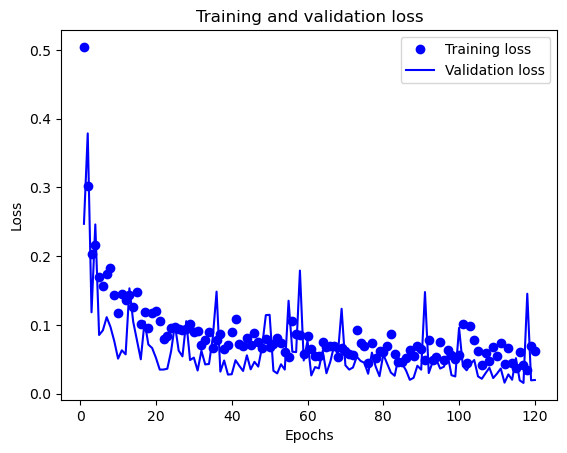

In [1242]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation lossloss_values = history_dict['loss']
plt.clf()
loss_values = d4_heavy_dict["loss"]
val_loss_values = d4_heavy_dict['val_loss']

epochs = range(1, len(d4_heavy_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Final Model Accuracy

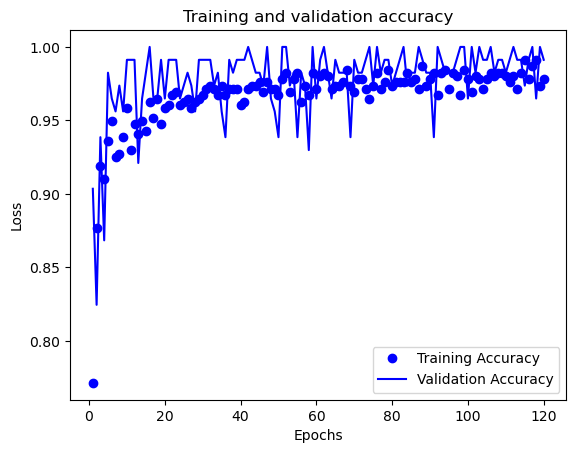

In [1244]:
#Most of this code is not mine, I have only inserted the names of my variables.
#Code referenced from: hollet F., Deep Learning With Python (2017), Chapter 3.4.4, Listing 3.9 Plotting the training and validation loss
plt.clf()
acc_values = d4_heavy_dict['accuracy']
val_acc_values = d4_heavy_dict['val_accuracy']

plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion

To conclude, this report begins with an idea of establishing a model to accurately ascertain between benign and malignant breast cancer diagnoses based on data regarding formations on the breast area (binary classification problem). To achieve that, the measure of success is precision at recall as the dataset is imbalanced and due to the abundance of data, hold-out validation was chosen. After modifying data to fit properly in a model, a baseline and overfitted models are produced. 

Then, through rigorous experimentation, the number of layers, regularization method/s and hyperparameters are determined to produce a final model, dubbed "Dropout4 Heavy" (due to having 4 128-unit dense layers (3 RelU, 1 sigmoid) and using dropout on the input layer). 

This final model trained for 120 epochs at batch size 16 achieved 97.8% mean accuracy, 6.1% mean loss(error), 95.5% mean precision at 96.2% mean recall. This greatly exceeded the expected outputs and the project terminates considered a success.

Thank you for your time taken to read this.

# References: 
## Citations:
1. ACS, Cancer Facts For Women, Breast Cancer, October 31, 2023 - https://www.cancer.org/cancer/risk-prevention/understanding-cancer-risk/cancer-facts/cancer-facts-for-women.html#:~:text=Breast%20cancer%20is%20the%20most,breast%20cancer%20in%20their%20lifetime.
2. Chollet F., Deep Learning With Python (2017), Chapter 4.5
3. Chollet F., Deep Learning With Python (2017), Chapter 4.4.2 

## Datasets:
1. IMDB - https://ai.stanford.edu/%7Eamaas/data/sentiment/
2. MNIST - https://www.tensorflow.org/datasets/catalog/mnist
3. Wisconsin Breast Cancer - https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
4. AI Vs Human Text - https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text
5. Reuters - https://keras.io/api/datasets/reuters/
6. COVID-19 Hospitals Treatment Plan - https://www.kaggle.com/datasets/arashnic/covid19-hospital-treatment
7. Cirrhosis Outcomes Dataset - https://www.kaggle.com/datasets/harshitstark/prediction-of-cirrhosis-outcomes
8. Boston Housing Price - https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
9. Auto MPG - https://archive.ics.uci.edu/dataset/9/auto+mpg